In [32]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from scipy import *

import seaborn as sns
from wordcloud import WordCloud
import mplcyberpunk
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)

import warnings 
warnings.filterwarnings("ignore")
plt.style.use("cyberpunk")

In [33]:
mpl.rcParams["font.style"] = "italic"
mpl.rcParams["font.weight"] = "bold"
mpl.rcParams["axes.linewidth"] = 1.5
mpl.rcParams["figure.dpi"] = 150
mpl.rcParams["axes.titlesize"] = 20
mpl.rcParams["axes.labelsize"] = 15
mpl.rcParams["axes.titleweight"] = "bold"
mpl.rcParams["axes.titlelocation"] = "left"
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.labelweight"] = "bold"
mpl.rcParams["axes.labelpad"] = 5
mpl.rcParams["axes.titlepad"] = 20
mpl.rcParams['axes.labelcolor'] = "white"
mpl.rcParams['axes.edgecolor'] = "white"
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['xtick.color'] = "white"
mpl.rcParams['ytick.color'] = "white"
mpl.rcParams["boxplot.boxprops.color"] = "white"
mpl.rcParams["boxplot.whiskerprops.color"] = "white"
mpl.rcParams["boxplot.capprops.color"] = "white"
mpl.rcParams["boxplot.flierprops.markerfacecolor"] =  "white"


In [34]:
train = pd.read_csv("/storage/emulated/0/Participants_Data_PLD/train.csv") 
test = pd.read_csv("/storage/emulated/0/Participants_Data_PLD/test.csv") 
sub = pd.read_csv("/storage/emulated/0/Participants_Data_PLD/submission.csv") 


In [4]:
train.head()

ID  Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0  65087372        10000          32236             12329.36286    59   
1   1450153         3609          11940             12191.99692    59   
2   1969101        28276           9311             21603.22455    59   
3   6651430        11170           6954             17877.15585    59   
4  14354669        16890          13226             13539.92667    59   

  Batch Enrolled  Interest Rate Grade Sub Grade Employment Duration  \
0     BAT2522922      11.135007     B        C4            MORTGAGE   
1     BAT1586599      12.237563     C        D3                RENT   
2     BAT2136391      12.545884     F        D4            MORTGAGE   
3     BAT2428731      16.731201     C        C3            MORTGAGE   
4     BAT5341619      15.008300     C        D4            MORTGAGE   

   Home Ownership Verification Status Payment Plan               Loan Title  \
0    176346.62670        Not Verified            n       Debt Consolidation   
1     39833.92100     Source Verified            n       Debt consolidation   
2     91506.69105     Source Verified            n       Debt Consolidation   
3    108286.57590     Source Verified            n       Debt consolidation   
4     44234.82545     Source Verified            n  Credit card refinancing   

   Debit to Income  Delinquency - two years  Inquires - six months  \
0        16.284758                        1                      0   
1        15.412409                        0                      0   
2        28.137619                        0                      0   
3        18.043730                        1                      0   
4        17.209886                        1                      3   

   Open Account  Public Record  Revolving Balance  Revolving Utilities  \
0            13              0              24246            74.932551   
1            12              0                812            78.297186   
2            14              0               1843             2.073040   
3             7              0              13819            67.467951   
4            13              1               1544            85.250761   

   Total Accounts Initial List Status  Total Received Interest  \
0               7                   w              2929.646315   
1              13                   f               772.769385   
2              20                   w               863.324396   
3              12                   w               288.173196   
4              22                   w               129.239553   

   Total Received Late Fee   Recoveries  Collection Recovery Fee  \
0                 0.102055     2.498291                 0.793724   
1                 0.036181     2.377215                 0.974821   
2                18.778660     4.316277                 1.020075   
3                 0.044131     0.107020                 0.749971   
4                19.306646  1294.818751                 0.368953   

   Collection 12 months Medical Application Type  Last week Pay  \
0                             0       INDIVIDUAL             49   
1                             0       INDIVIDUAL            109   
2                             0       INDIVIDUAL             66   
3                             0       INDIVIDUAL             39   
4                             0       INDIVIDUAL             18   

   Accounts Delinquent  Total Collection Amount  Total Current Balance  \
0                    0                       31                 311301   
1                    0                       53                 182610   
2                    0                       34                  89801   
3                    0                       40                   9189   
4                    0                      430                 126029   

   Total Revolving Credit Limit  Loan Status  
0                          6619            0  
1                         20885            0  
2      

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [35]:
# check nan values

pd.DataFrame({"train/null":(train.isnull().sum() /train.shape[0]) *100, 
              "test/null": (test.isnull().sum() /test.shape[0]) *100}) 

train/null  test/null
ID                                   0.0        0.0
Loan Amount                          0.0        0.0
Funded Amount                        0.0        0.0
Funded Amount Investor               0.0        0.0
Term                                 0.0        0.0
Batch Enrolled                       0.0        0.0
Interest Rate                        0.0        0.0
Grade                                0.0        0.0
Sub Grade                            0.0        0.0
Employment Duration                  0.0        0.0
Home Ownership                       0.0        0.0
Verification Status                  0.0        0.0
Payment Plan                         0.0        0.0
Loan Title                           0.0        0.0
Debit to Income                      0.0        0.0
Delinquency - two years              0.0        0.0
Inquires - six months                0.0        0.0
Open Account                         0.0        0.0
Public Record                        0.0        0.0
Revolving Balance                    0.0        0.0
Revolving Utilities                  0.0        0.0
Total Accounts                       0.0        0.0
Initial List Status                  0.0        0.0
Total Received Interest              0.0        0.0
Total Received Late Fee              0.0        0.0
Recoveries                           0.0        0.0
Collection Recovery Fee              0.0        0.0
Collection 12 months Medical         0.0        0.0
Application Type                     0.0        0.0
Last week Pay                        0.0        0.0
Accounts Delinquent                  0.0        0.0
Total Collection Amount              0.0        0.0
Total Current Balance                0.0        0.0
Total Revolving Credit Limit         0.0        0.0
Loan Status                          0.0      100.0

In [36]:
# check duplicated values

train.duplicated().sum() 

0

## Loan (target) 

Loan Status
0      0.90749
1      0.09251

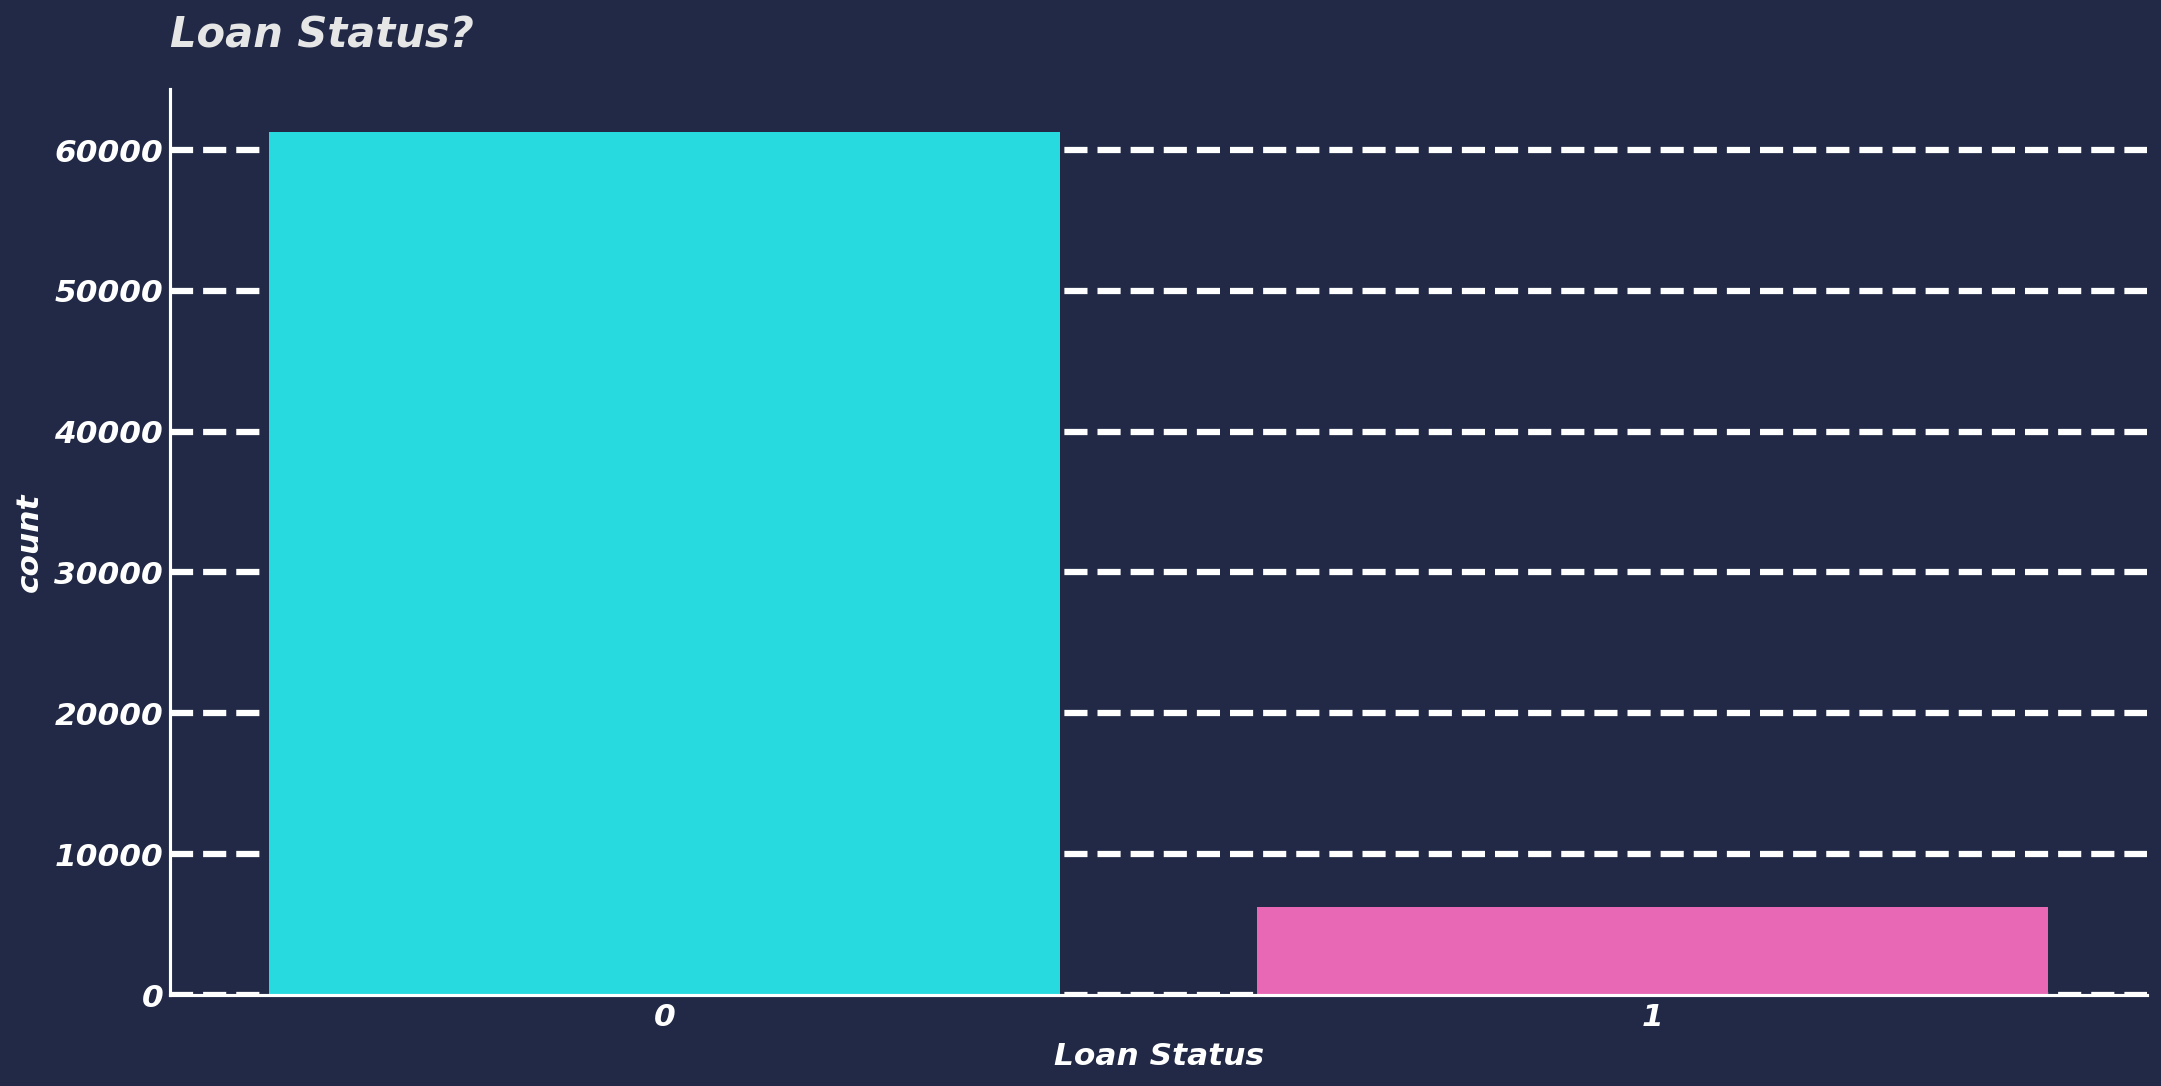

In [29]:
plt.figure(figsize=(17,8))

sns.countplot(train["Loan Status"])
plt.grid(axis="y", linewidth=3, linestyle="--", color="white") 
plt.title("Loan Status?") 

train["Loan Status"].value_counts(normalize=True).to_frame() 

In [5]:
loan_1 = train[train["Loan Status"] == 1]
loan_0 = train[train["Loan Status"] == 0]

In [ ]:
# descriptive analysis between loan_1 & loan_0


In [6]:
# loan_1
# category features
print("Loan_1, category features")

loan_1.describe(include="object") 

Loan_1, category features


Batch Enrolled Grade Sub Grade Employment Duration Verification Status  \
count            6241  6241      6241                6241                6241   
unique             41     7        35                   3                   3   
top        BAT3873588     C        B4            MORTGAGE     Source Verified   
freq              340  1792       410                3223                3085   

       Payment Plan               Loan Title Initial List Status  \
count          6241                     6241                6241   
unique            1                       91                   2   
top               n  Credit card refinancing                   w   
freq           6241                     2888                3227   

       Application Type  
count              6241  
unique                2  
top          INDIVIDUAL  
freq               6230

In [49]:
# loan_0
# category features
print("Loan_0, category features")

loan_0.describe(include="object") 

Loan_0, category features


Batch Enrolled  Grade Sub Grade Employment Duration  \
count           61222  61222     61222               61222   
unique             41      7        35                   3   
top        BAT3873588      C        B4            MORTGAGE   
freq             3286  17293      4052               33128   

       Verification Status Payment Plan               Loan Title  \
count                61222        61222                    61222   
unique                   3            1                      109   
top        Source Verified            n  Credit card refinancing   
freq                 29951        61222                    27840   

       Initial List Status Application Type  
count                61222            61222  
unique                   2                2  
top                      w       INDIVIDUAL  
freq                 33072            61110

In [43]:
# loan_1
# numeric features
print("Loan_1, numeric features")

loan_1.describe() 

Loan_1, numeric features


ID   Loan Amount  Funded Amount  Funded Amount Investor  \
count  6.241000e+03   6241.000000     6241.00000             6241.000000   
mean   2.565877e+07  16731.674411    15805.42349            14619.865956   
std    2.110453e+07   8469.808410     8115.27308             6870.402047   
min    1.297933e+06   1038.000000     1153.00000             1587.968111   
25%    6.618791e+06   9778.000000     9348.00000             9715.956808   
50%    1.812955e+07  15892.000000    13089.00000            12676.600890   
75%    4.287751e+07  22161.000000    21734.00000            18621.297220   
max    7.199332e+07  34997.000000    34959.00000            34956.998620   

              Term  Interest Rate  Home Ownership  Debit to Income  \
count  6241.000000    6241.000000     6241.000000      6241.000000   
mean     58.138279      11.880032    81065.543995        23.218310   
std       3.550633       3.789159    45486.755146         8.381573   
min      36.000000       5.323521    15652.734480         0.961457   
25%      58.000000       9.282680    51767.160110        16.731020   
50%      59.000000      11.388299    69932.349690        22.732386   
75%      59.000000      14.222788    96181.663880        29.743834   
max      59.000000      26.307264   400348.819600        39.627322   

       Delinquency - two years  Inquires - six months  Open Account  \
count              6241.000000            6241.000000   6241.000000   
mean                  0.352187               0.146611     14.128665   
std                   0.872468               0.477851      6.214175   
min                   0.000000               0.000000      2.000000   
25%                   0.000000               0.000000     10.000000   
50%                   0.000000               0.000000     12.000000   
75%                   0.000000               0.000000     15.000000   
max                   8.000000               4.000000     37.000000   

       Public Record  Revolving Balance  Revolving Utilities  Total Accounts  \
count    6241.000000        6241.000000          6241.000000     6241.000000   
mean        0.092934        7673.002243            53.180279       18.633713   
std         0.383577        7725.413572            22.512559        8.563869   
min         0.000000           1.000000             0.158595        4.000000   
25%         0.000000        2637.000000            38.986474       12.000000   
50%         0.000000        5587.000000            54.302614       18.000000   
75%         0.000000        9999.000000            69.390298       24.000000   
max         4.000000      116933.000000           100.855335       69.000000   

       Total Received Interest  Total Received Late Fee   Recoveries  \
count              6241.000000              6241.000000  6241.000000   
mean               2080.680944                 1.297790    58.962992   
std                2254.021048                 5.599704   355.057425   
min                   5.521208                 0.000033     0.001387   
25%                 580.902407                 0.020860     1.648214   
50%                1339.919271                 0.042526     3.414617   
75%                2634.826770                 0.071203     5.497466   
max               14258.302400                42.416569  4003.028699   

       Collection Recovery Fee  Collection 12 months Medical  Last week Pay  \
count              6241.000000                   6241.000000    6241.000000   
mean                  1.083303                      0.020990      71.993110   
std                   3.291519                      0.143363      43.221186   
min                   0.000081                      0.000000       0.000000   
25%                   0.457307                      0.000000      37.000000   
50%                   0.761049                      0.000000      69.000000   
75%                   1.049253                      0.000000     106.000000   
max                  47.486404                      1.00000

In [41]:
# loan_0
# numeric features
print("Loan_0, numeric features")

loan_0.describe() 

Loan_0, numeric features


ID   Loan Amount  Funded Amount  Funded Amount Investor  \
count  6.122200e+04  61222.000000    61222.00000            61222.000000   
mean   2.562443e+07  16860.853092    15767.04910            14621.996411   
std    2.109040e+07   8357.381374     8154.68281             6776.671183   
min    1.298156e+06   1014.000000     1014.00000             1114.590204   
25%    6.566993e+06  10042.250000     9255.00000             9845.684836   
50%    1.790000e+07  16087.000000    13032.00000            12806.409390   
75%    4.270217e+07  22098.000000    21801.00000            17748.224160   
max    7.224578e+07  35000.000000    34999.00000            34999.746430   

               Term  Interest Rate  Home Ownership  Debit to Income  \
count  61222.000000   61222.000000    61222.000000     61222.000000   
mean      58.177436      11.842815    80488.081484        23.307491   
std        3.303851       3.711378    44982.239350         8.458977   
min       36.000000       5.320006    14573.537170         0.675299   
25%       58.000000       9.298548    51678.569317        16.760928   
50%       59.000000      11.376376    69274.739920        22.652777   
75%       59.000000      14.189447    94458.038567        30.069674   
max       59.000000      27.182348   406561.536400        39.629862   

       Delinquency - two years  Inquires - six months  Open Account  \
count             61222.000000           61222.000000  61222.000000   
mean                  0.324573               0.145667     14.280618   
std                   0.793192               0.472828      6.226048   
min                   0.000000               0.000000      2.000000   
25%                   0.000000               0.000000     10.000000   
50%                   0.000000               0.000000     13.000000   
75%                   0.000000               0.000000     16.000000   
max                   8.000000               5.000000     37.000000   

       Public Record  Revolving Balance  Revolving Utilities  Total Accounts  \
count   61222.000000       61222.000000         61222.000000    61222.000000   
mean        0.080265        7702.027555            52.859795       18.627340   
std         0.342595        7847.406097            22.542163        8.293976   
min         0.000000           0.000000             0.005172        4.000000   
25%         0.000000        2548.000000            38.623246       13.000000   
50%         0.000000        5508.000000            54.051977       18.000000   
75%         0.000000       10206.000000            69.146929       23.000000   
max         4.000000      114621.000000           100.880050       72.000000   

       Total Received Interest  Total Received Late Fee    Recoveries  \
count             61222.000000             61222.000000  61222.000000   
mean               2067.801020                 1.128288     59.765850   
std                2218.635322                 5.206573    357.229252   
min                   4.736746                 0.000003      0.000036   
25%                 569.214053                 0.021131      1.626781   
50%                1329.806776                 0.043496      3.336222   
75%                2658.901893                 0.071949      5.448862   
max               14301.368310                42.618882   4354.467419   

       Collection Recovery Fee  Collection 12 months Medical  Last week Pay  \
count             61222.000000                  61222.000000   61222.000000   
mean                  1.129406                      0.021332      71.078665   
std                   3.509474                      0.144490      43.324943   
min                   0.000036                      0.000000       0.000000   
25%                   0.478150                      0.000000      35.000000   
50%                   0.782344                      0.000000      68.000000   
75%                   1.072563                      0.000000     104.000000   
max                 166.833000           

In [ ]:
# pisahkan feature category & numeric

In [37]:
numer = train.select_dtypes("number").columns
cater = train.select_dtypes("object").columns

## Category features

In [36]:
# descriptive analysis of category features

train[cater].describe() 

Batch Enrolled  Grade Sub Grade Employment Duration  \
count           67463  67463     67463               67463   
unique             41      7        35                   3   
top        BAT3873588      C        B4            MORTGAGE   
freq             3626  19085      4462               36351   

       Verification Status Payment Plan               Loan Title  \
count                67463        67463                    67463   
unique                   3            1                      109   
top        Source Verified            n  Credit card refinancing   
freq                 33036        67463                    30728   

       Initial List Status Application Type  
count                67463            67463  
unique                   2                2  
top                      w       INDIVIDUAL  
freq                 36299            67340

In [37]:
train[cater].head()

Batch Enrolled Grade Sub Grade Employment Duration Verification Status  \
0     BAT2522922     B        C4            MORTGAGE        Not Verified   
1     BAT1586599     C        D3                RENT     Source Verified   
2     BAT2136391     F        D4            MORTGAGE     Source Verified   
3     BAT2428731     C        C3            MORTGAGE     Source Verified   
4     BAT5341619     C        D4            MORTGAGE     Source Verified   

  Payment Plan               Loan Title Initial List Status Application Type  
0            n       Debt Consolidation                   w       INDIVIDUAL  
1            n       Debt consolidation                   f       INDIVIDUAL  
2            n       Debt Consolidation                   w       INDIVIDUAL  
3            n       Debt consolidation                   w       INDIVIDUAL  
4            n  Credit card refinancing                   w       INDIVIDUAL

In [ ]:
## batch enrolled


In [42]:
train["Batch Enrolled"].value_counts() 

BAT3873588    3626
BAT1586599    3142
BAT1104812    2996
BAT2252229    2557
BAT2803411    2425
BAT1780517    2403
BAT1184694    2298
BAT2078974    2290
BAT2575549    2257
BAT4694572    2248
BAT4271519    2054
BAT2558388    1963
BAT3193689    1864
BAT1930365    1844
BAT2136391    1790
BAT2333412    1775
BAT3726927    1774
BAT4136152    1766
BAT5341619    1717
BAT5525466    1709
BAT5489674    1677
BAT5629144    1639
BAT1766061    1461
BAT2833642    1421
BAT5924421    1404
BAT2522922    1399
BAT2428731    1398
BAT4808022    1303
BAT4351734    1140
BAT5547201    1127
BAT5714674    1105
BAT3461431    1068
BAT224923      895
BAT1761981     894
BAT4722912     887
BAT2003848     842
BAT1467036     802
BAT5849876     768
BAT3865626     728
BAT5811547     711
BAT1135695     296
Name: Batch Enrolled, dtype: int64

In [43]:
# rata² status loan berdasarkan batch enrolled

train.groupby("Batch Enrolled")["Loan Status"].mean().to_frame().sort_values("Loan Status",ascending=False).style.bar("Loan Status",color="red")

In [ ]:
## grade

In [38]:
train.Grade.value_counts()

C    19085
B    18742
A    12055
D     8259
E     6446
F     2246
G      630
Name: Grade, dtype: int64

Text(0.0, 1.0, 'Grade')

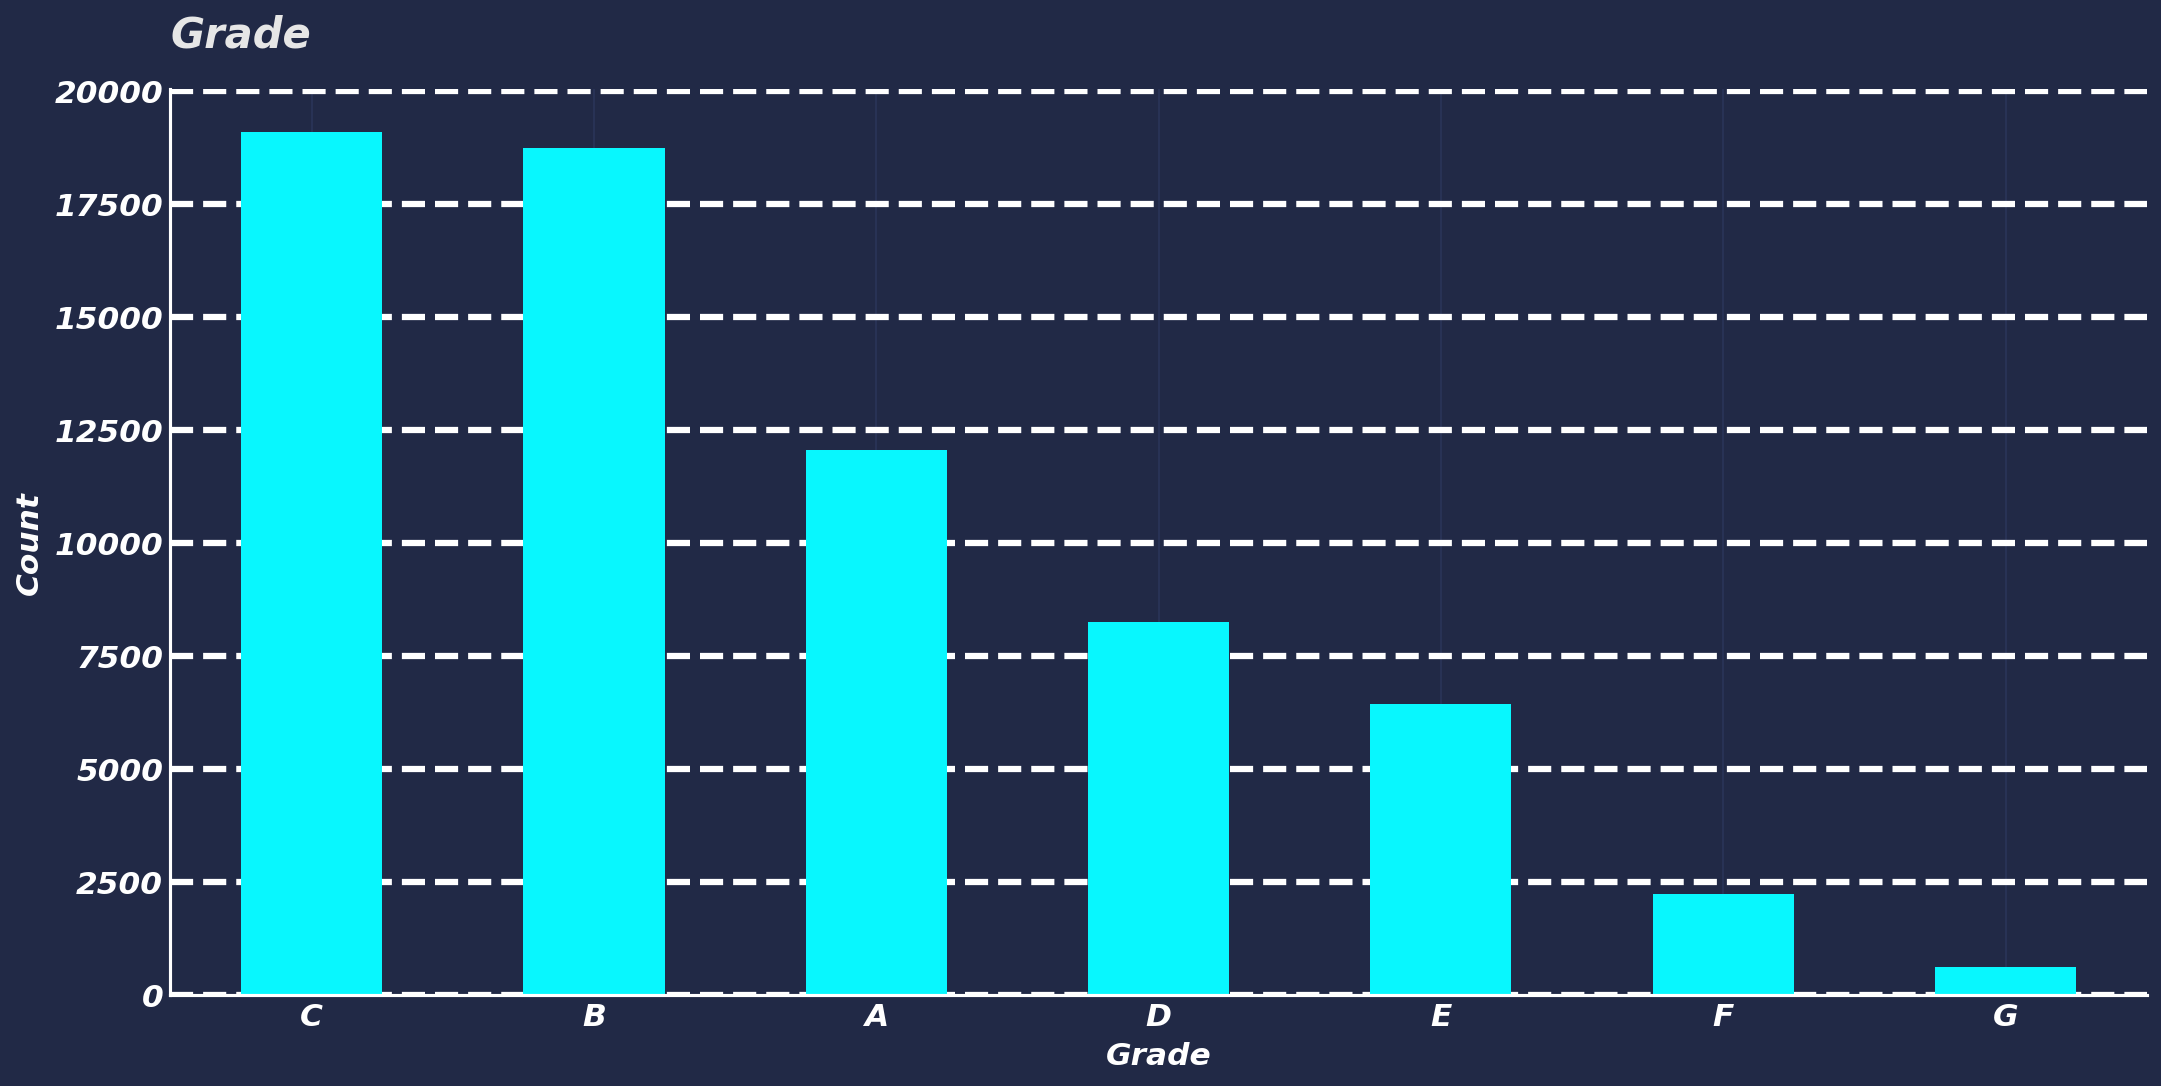

In [48]:
plt.figure(figsize=(17,8))

train.Grade.value_counts().plot(kind="bar", figsize=(17, 8)) 
plt.xlabel("Grade")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis="y", linewidth=3, linestyle="--", color="white") 
plt.title("Grade") 

In [45]:
# rata² status loan berdasarkan grade enrolled

train.groupby("Grade")["Loan Status"].mean().to_frame().sort_values("Loan Status",ascending=False).style.bar("Loan Status",color="red")

In [ ]:
## subgrade

In [49]:
train["Sub Grade"].value_counts()

B4    4462
C1    4188
B3    3999
A5    3540
B2    3520
B5    3408
D1    3304
C4    3250
C2    3219
C3    3121
B1    2924
C5    2472
A4    2264
D4    2050
D2    1963
D5    1952
A2    1837
D3    1824
E2    1746
A3    1685
A1    1364
E3    1321
E1    1298
E4    1117
F2     947
F1     824
E5     769
F5     582
F3     578
G2     447
F4     441
G1     366
G5     284
G3     246
G4     151
Name: Sub Grade, dtype: int64

In [51]:
# rata² status loan berdasarkan batch enrolled

train.groupby("Sub Grade")["Loan Status"].mean().to_frame().sort_values("Loan Status",ascending=False).style.bar("Loan Status",color="red")

In [52]:
# ambil nilai abjad, periksa
sub = train["Sub Grade"].apply(lambda x: x[0])

In [53]:
sub.value_counts()

B    18313
C    16250
D    11093
A    10690
E     6251
F     3372
G     1494
Name: Sub Grade, dtype: int64

In [54]:
# rata² status loan berdasarkan sub enrolled

train.groupby(sub)["Loan Status"].mean().to_frame().sort_values("Loan Status",ascending=False).style.bar("Loan Status",color="red")

In [ ]:
##Employment Duration

In [55]:
train["Employment Duration"].value_counts() 

MORTGAGE    36351
RENT        24150
OWN          6962
Name: Employment Duration, dtype: int64

Text(0.0, 1.0, 'Employment Duration')

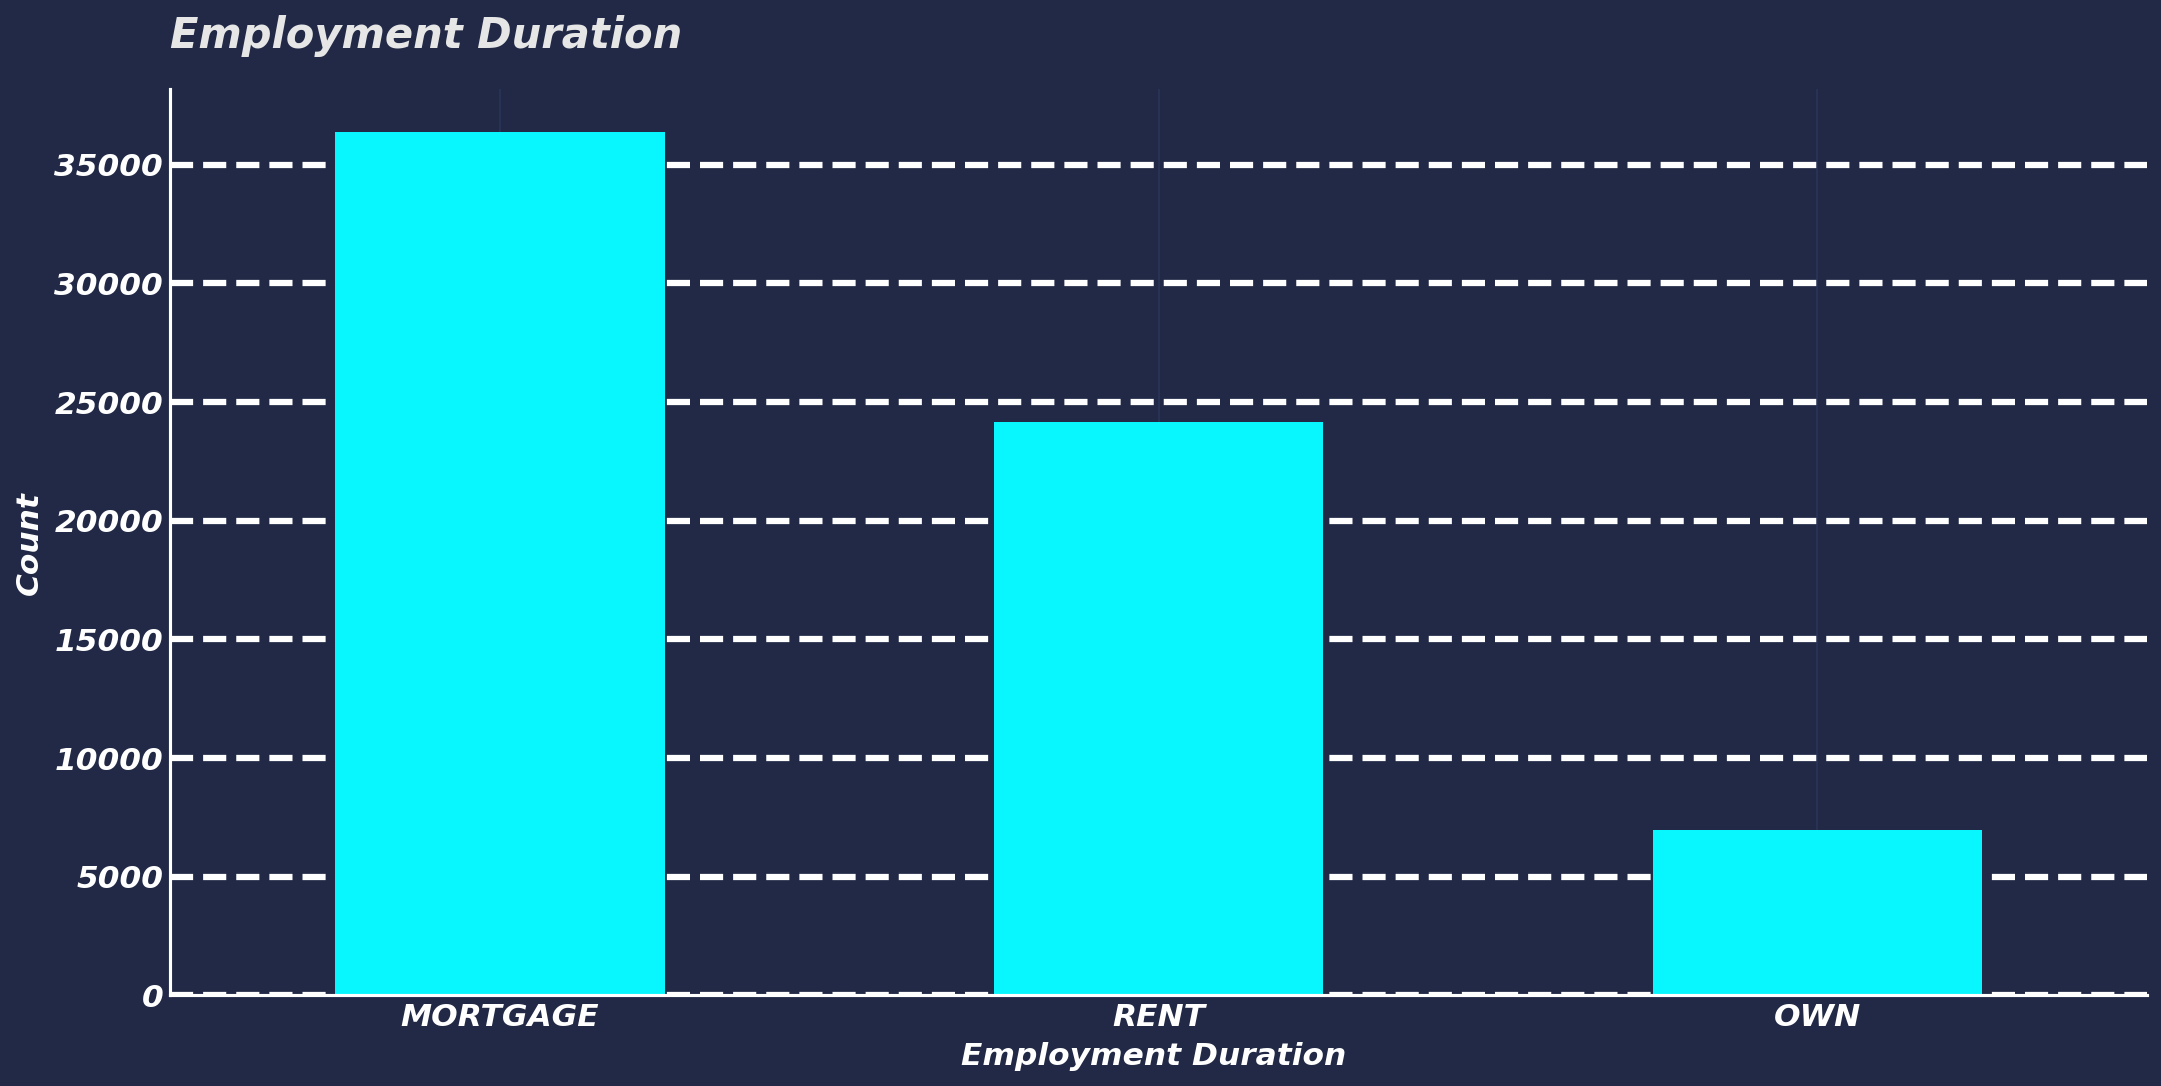

In [56]:
plt.figure(figsize=(17,8))

train["Employment Duration"].value_counts().plot(kind="bar", figsize=(17, 8)) 
plt.xlabel("Employment Duration ")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis="y", linewidth=3, linestyle="--", color="white") 
plt.title("Employment Duration") 

In [58]:
# rata² status loan berdasarkan Employment Duration enrolled

train.groupby("Employment Duration")["Loan Status"].mean().to_frame().sort_values("Loan Status",ascending=False).style.bar("Loan Status",color="red")

In [ ]:
##Verification Status

In [59]:
train["Verification Status"].value_counts() 

Source Verified    33036
Verified           18078
Not Verified       16349
Name: Verification Status, dtype: int64

Text(0.0, 1.0, 'Verification Status')

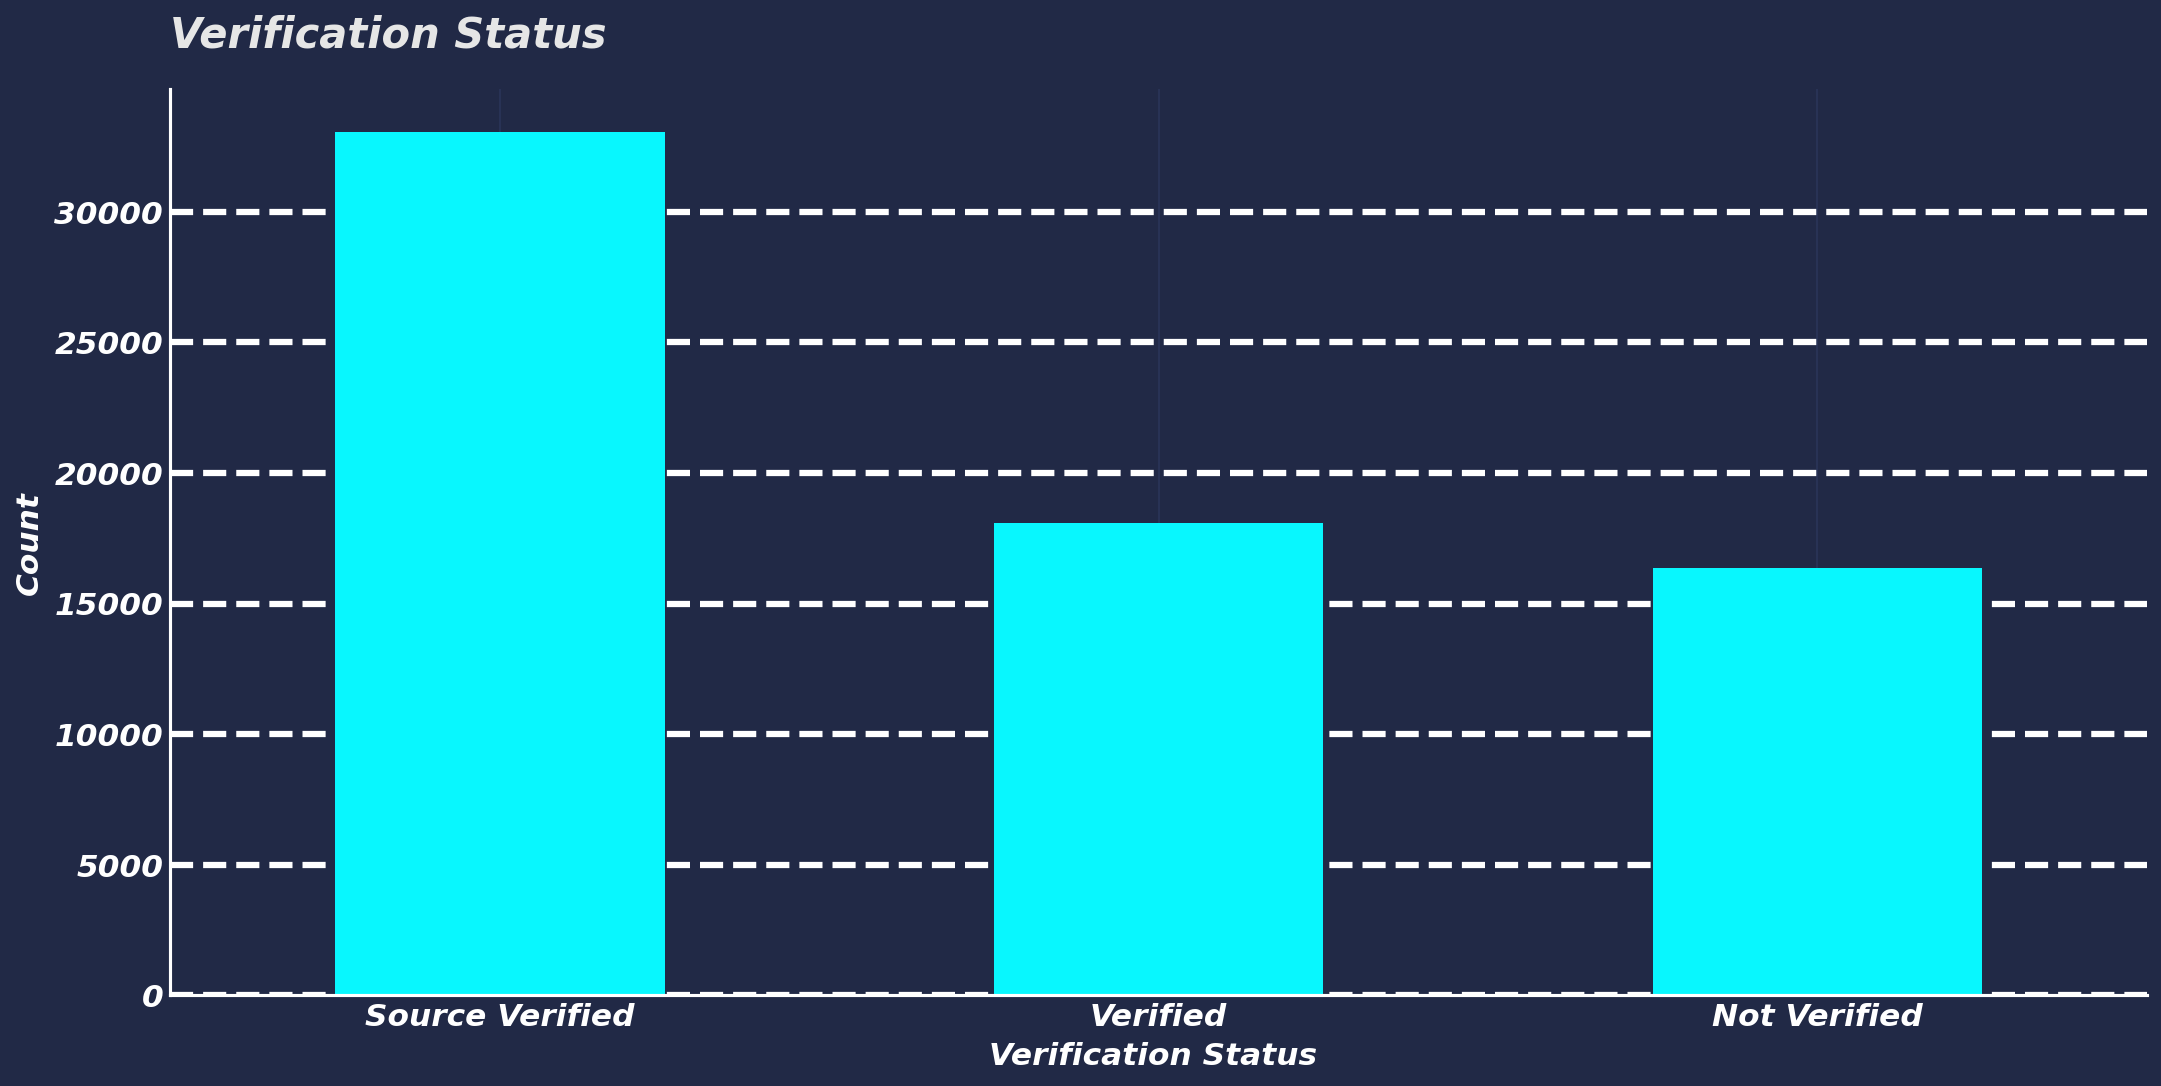

In [60]:
plt.figure(figsize=(17,8))

train["Verification Status"].value_counts().plot(kind="bar", figsize=(17, 8)) 
plt.xlabel("Verification Status ")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis="y", linewidth=3, linestyle="--", color="white") 
plt.title("Verification Status") 

In [75]:
# rata² status loan berdasarkan verification status enrolled

train.groupby("Verification Status")["Loan Status"].mean().to_frame().sort_values("Loan Status",ascending=False).style.bar("Loan Status",color="red")

In [ ]:
## payment plan

In [39]:
# drop payment plan because low frequency

for i in [train, test]: 
    i.drop("Payment Plan", axis=1, inplace=True) 
   

In [ ]:
##Loan Title

In [18]:
# check 

train["Loan Title"].value_counts() 

Credit card refinancing       30728
Debt consolidation            24841
Debt Consolidation             3544
Other                          2455
Home improvement               2211
Major purchase                  487
Medical expenses                237
Business                        183
Moving and relocation           157
Car financing                   135
Vacation                        114
debt consolidation              105
Consolidation                    97
Home buying                      94
Personal Loan                    78
Debt Consolidation Loan          71
Credit Card Consolidation        68
Home Improvement                 68
Consolidate                      55
Consolidation Loan               55
consolidation                    51
payoff                           50
DEBT CONSOLIDATION               46
Green loan                       45
Credit Card Debt                 45
Freedom                          45
consolidate                      42
Credit Card Refinance       

In [40]:
# ubah ke format yang banar 
              #Dept consolidation
loan_title = {"Debt Consolidation": "Debt consolidation", 
              "debt consolidation": "Debt consolidation", 
              "Debt Consolidation Loan": "Debt consolidation", 
              "DEBT CONSOLIDATION": "Debt consolidation", 
              "debt consolidation loan": "Debt consolidation", 
              "Debt Consolidation 2013": "Debt consolidation", 
              "Dept consolidation": "Debt consolidation", 
              # credit card refinancing
              "Credit Card Refinance": "Credit card refinancing",
              "Credit card refinance":  "Credit card refinancing", 
              "credit card refinance": "Credit card refinancing", 
              "CC Refinance": "Credit card refinancing", 
              "CC-Refinance": "Credit card refinancing", 
              "Credit Card Refi": "Credit card refinancing", 
              "CC Refi": "Credit card refinancing", 
              "Credit Card Refinance Loan": "Credit card refinancing", 
              }
              

In [41]:
# ubah ke format yang benar

for i in [train, test]: 
    i["Loan Title"] = i["Loan Title"].replace(loan_title) 

In [42]:
# check threshold nilai 

train["Loan Title"].value_counts(normalize=True)

Credit card refinancing      0.457599
Debt consolidation           0.424707
Other                        0.036390
Home improvement             0.032774
Major purchase               0.007219
Medical expenses             0.003513
Business                     0.002713
Moving and relocation        0.002327
Car financing                0.002001
Vacation                     0.001690
Consolidation                0.001438
Home buying                  0.001393
Personal Loan                0.001156
Home Improvement             0.001008
Credit Card Consolidation    0.001008
Consolidate                  0.000815
Consolidation Loan           0.000815
consolidation                0.000756
payoff                       0.000741
Credit Card Debt             0.000667
Freedom                      0.000667
Green loan                   0.000667
consolidate                  0.000623
Credit Card Payoff           0.000519
Credit Card                  0.000504
Loan                         0.000504
consolidatio

In [43]:
# karena fitur ini high cardinality saya akan mengubah jumlah nilai fitur yang kurang dari 5% ke nilai "other"

for i in [train,test]:
    # locate all the categories that are not rare.
    counts = i.groupby("Loan Title")["Loan Title"].count() / len(i)
    frequent_labels = [x for x in counts.loc[counts>0.05].index.values]
    
    # change the rare category names with the word rare, and thus encoding it.
    i["Loan Title"] = np.where(i["Loan Title"].isin(frequent_labels), i["Loan Title"], "Other")
    

In [14]:
# setelah pe-formatan 

train["Loan Title"].value_counts() 

Credit card refinancing    30871
Debt consolidation         28652
Other                       7940
Name: Loan Title, dtype: int64

In [59]:
# rata² status loan title berdasarkan verification status enrolled

train.groupby("Loan Title")["Loan Status"].mean().to_frame().sort_values("Loan Status",ascending=False).style.bar("Loan Status",color="red")

In [ ]:
##Initial List Status

In [74]:
train["Initial List Status"].value_counts()

# w == menunggu 
# f == diteruskan

w    36299
f    31164
Name: Initial List Status, dtype: int64

Text(0.0, 1.0, 'Initial List Status')

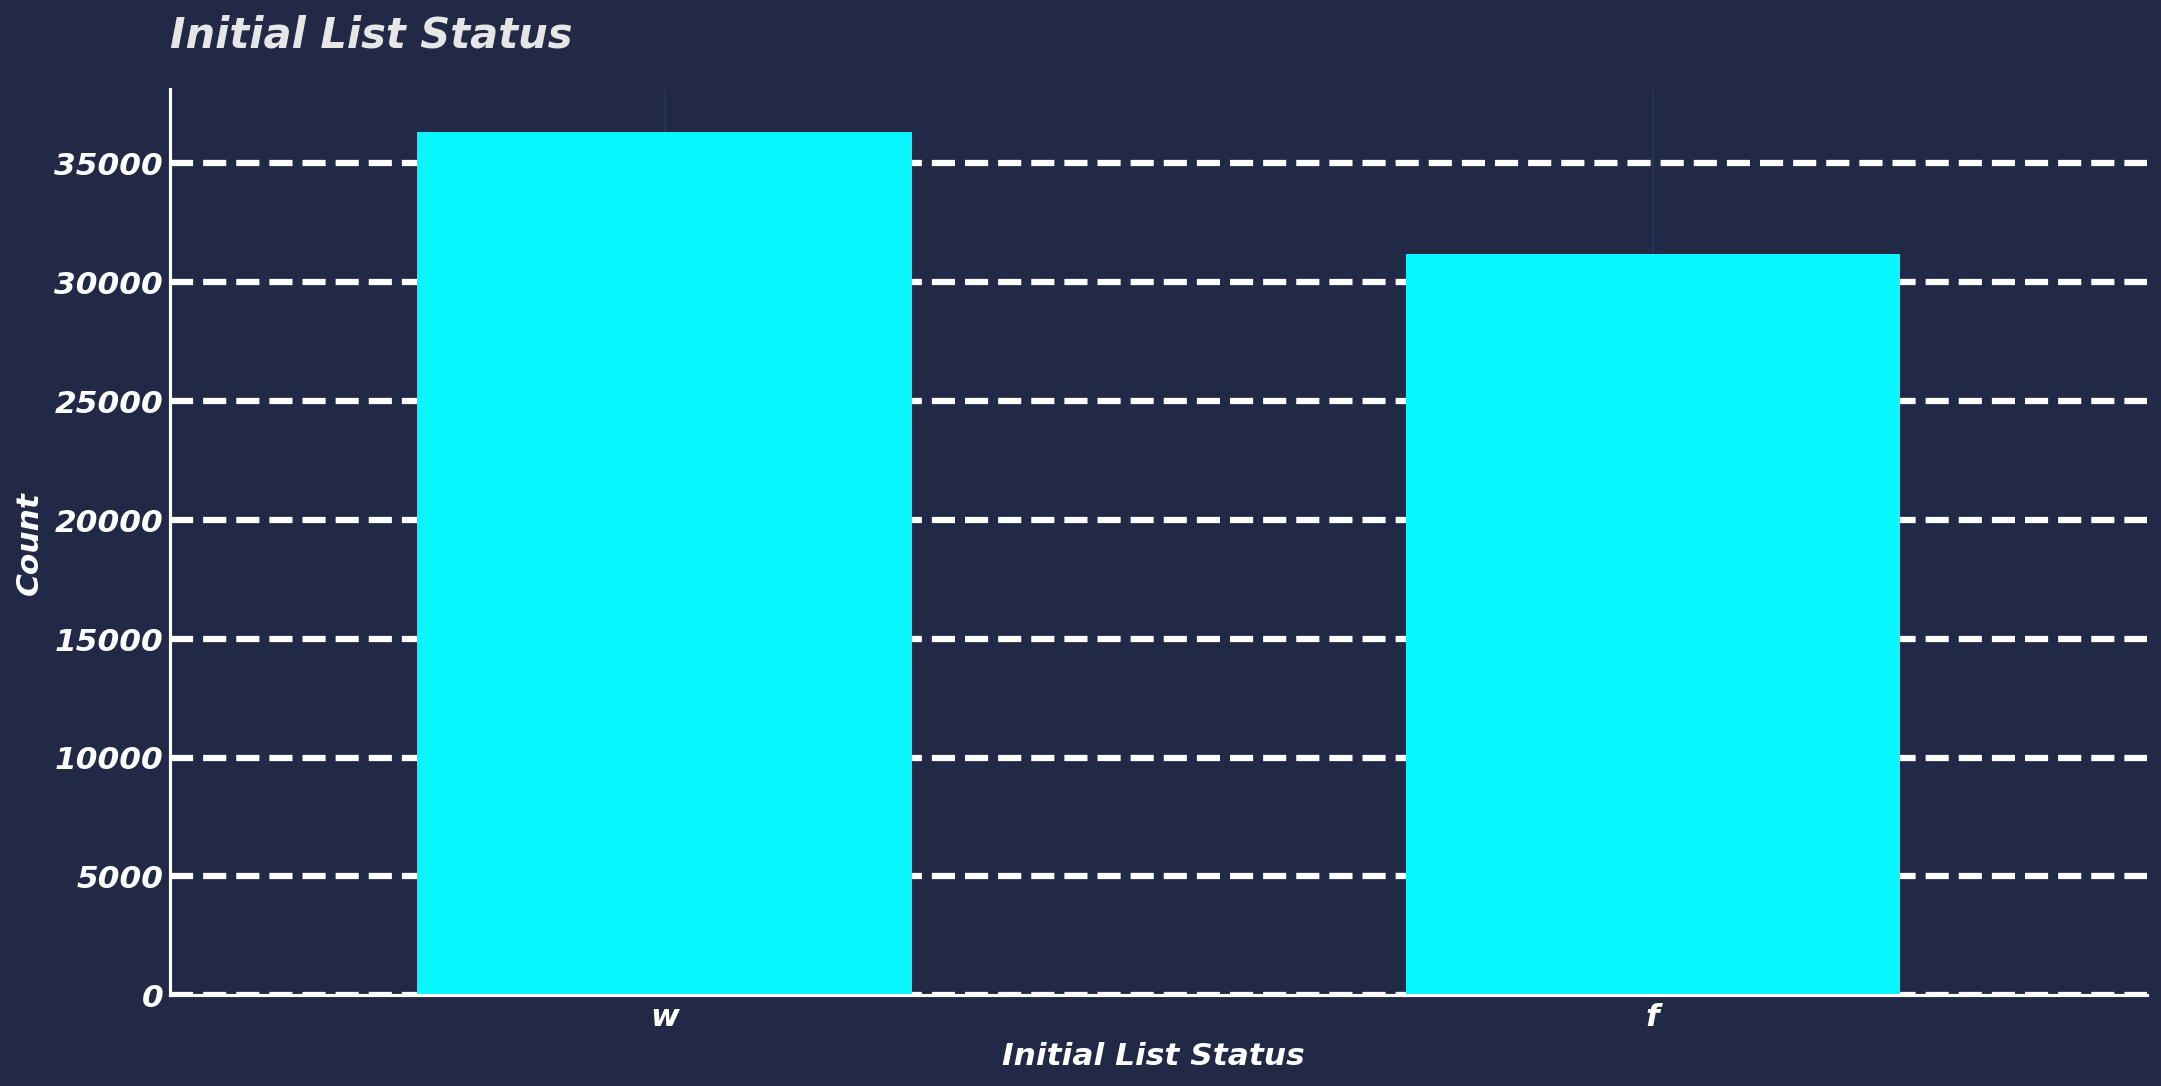

In [11]:
plt.figure(figsize=(17,8))

train["Initial List Status"].value_counts().plot(kind="bar", figsize=(17, 8)) 
plt.xlabel("Initial List Status ")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis="y", linewidth=3, linestyle="--", color="white") 
plt.title("Initial List Status") 

In [79]:
# rata² status loan berdasarkan initial list status enrolled

train.groupby("Initial List Status")["Loan Status"].mean().to_frame().sort_values("Loan Status",ascending=False).style.bar("Loan Status",color="red")

In [ ]:
#Application Type

INDIVIDUAL    0.998177
JOINT         0.001823
Name: Application Type, dtype: float64

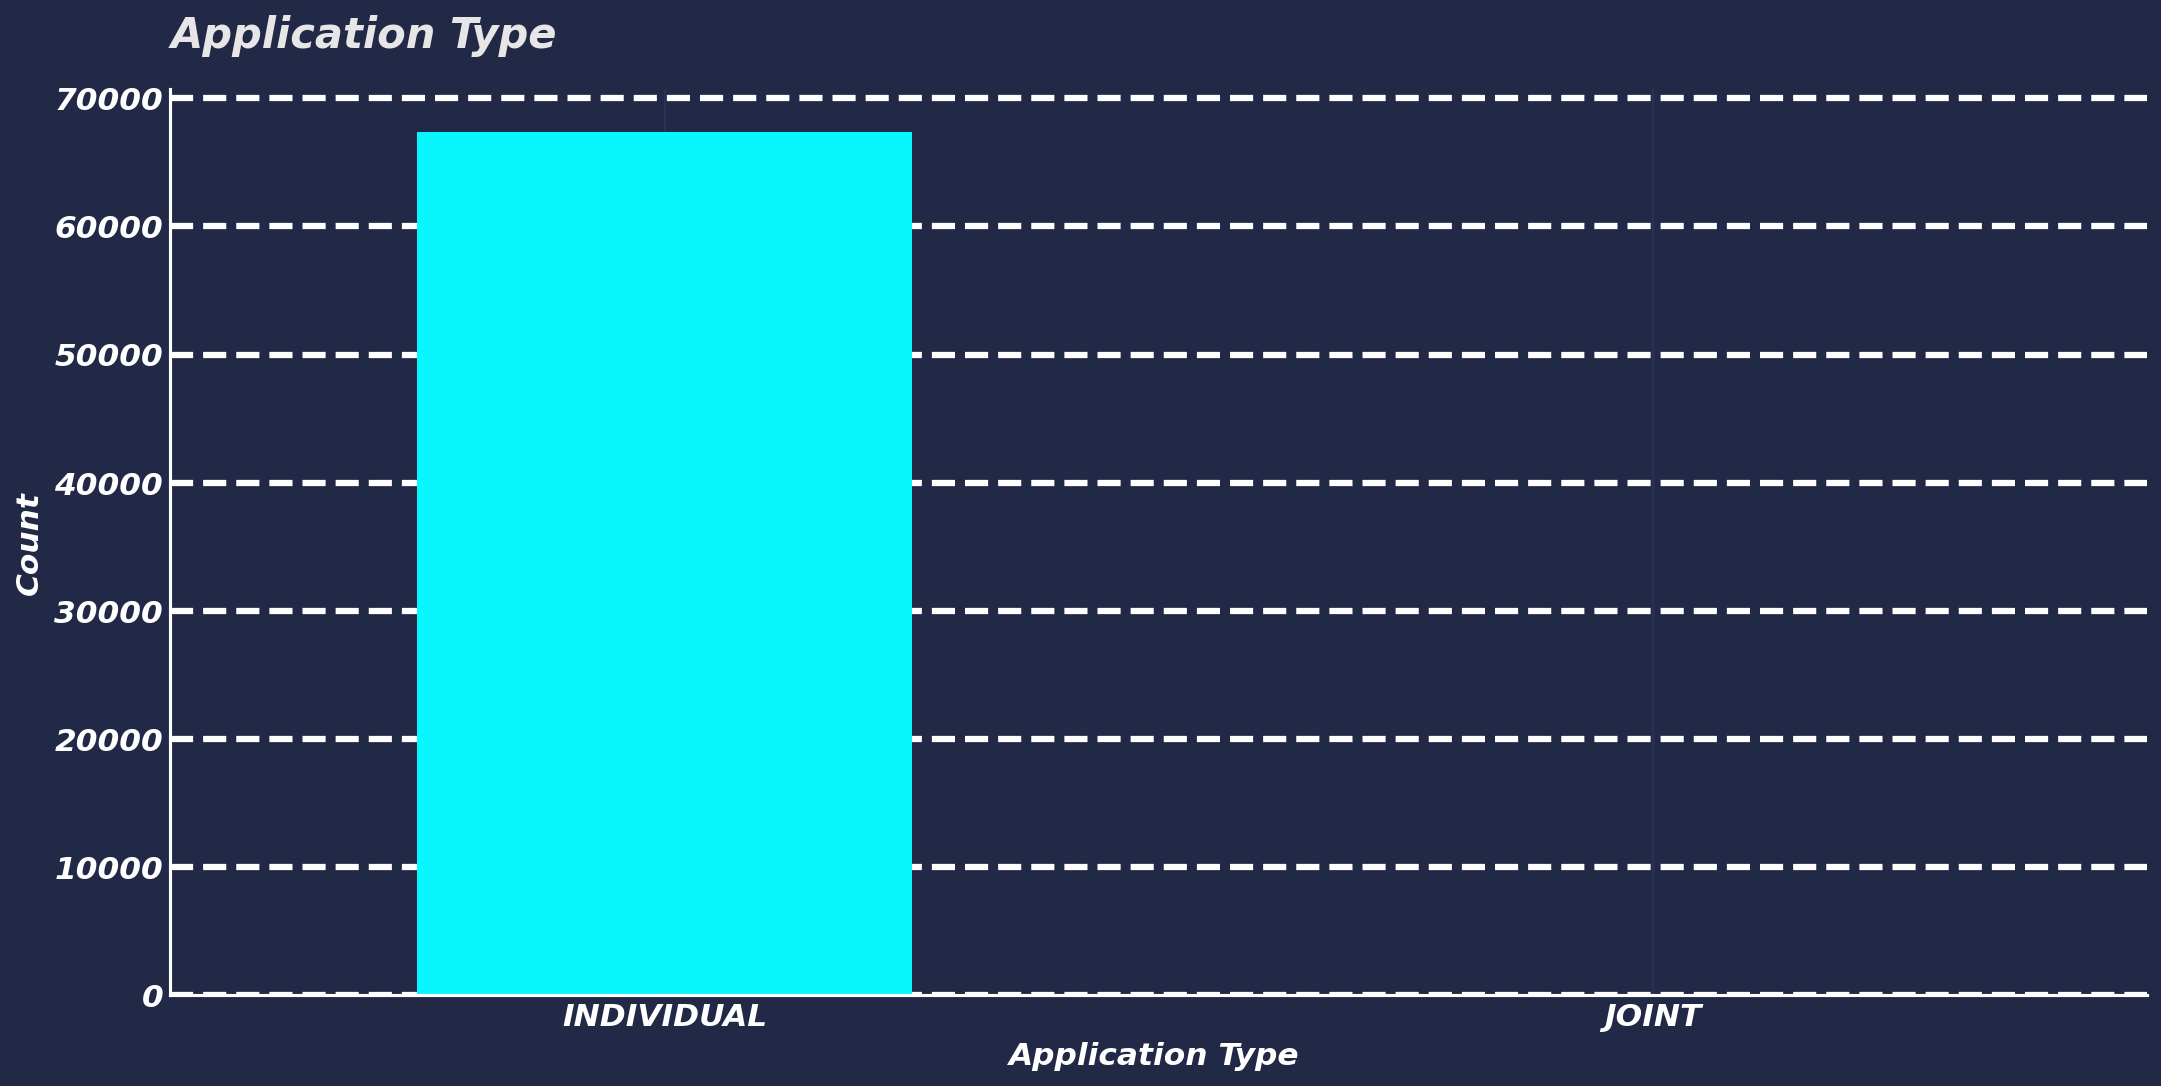

In [13]:
plt.figure(figsize=(17,8))

train["Application Type"].value_counts().plot(kind="bar", figsize=(17, 8)) 
plt.xlabel("Application Type ")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis="y", linewidth=3, linestyle="--", color="white") 
plt.title("Application Type") 

train["Application Type"].value_counts(normalize=True) 

In [14]:
# rata² status loan berdasarkan Application Type status enrolled

train.groupby("Application Type")["Loan Status"].mean().to_frame().sort_values("Loan Status",ascending=False).style.bar("Loan Status",color="red")

In [44]:
# drop Application Type

for i in [train, test]: 
    i.drop("Application Type", axis=1, inplace=True) 

## numeric features

In [45]:
train[numer].describe()

ID   Loan Amount  Funded Amount  Funded Amount Investor  \
count  6.746300e+04  67463.000000   67463.000000            67463.000000   
mean   2.562761e+07  16848.902776   15770.599114            14621.799323   
std    2.109155e+07   8367.865726    8150.992662             6785.345170   
min    1.297933e+06   1014.000000    1014.000000             1114.590204   
25%    6.570288e+06  10012.000000    9266.500000             9831.684984   
50%    1.791565e+07  16073.000000   13042.000000            12793.682170   
75%    4.271521e+07  22106.000000   21793.000000            17807.594120   
max    7.224578e+07  35000.000000   34999.000000            34999.746430   

               Term  Interest Rate  Home Ownership  Debit to Income  \
count  67463.000000   67463.000000    67463.000000     67463.000000   
mean      58.173814      11.846258    80541.502522        23.299241   
std        3.327441       3.718629    45029.120366         8.451824   
min       36.000000       5.320006    14573.537170         0.675299   
25%       58.000000       9.297147    51689.843335        16.756416   
50%       59.000000      11.377696    69335.832680        22.656658   
75%       59.000000      14.193533    94623.322785        30.048400   
max       59.000000      27.182348   406561.536400        39.629862   

       Delinquency - two years  Inquires - six months  Open Account  \
count             67463.000000           67463.000000  67463.000000   
mean                  0.327127               0.145754     14.266561   
std                   0.800888               0.473291      6.225060   
min                   0.000000               0.000000      2.000000   
25%                   0.000000               0.000000     10.000000   
50%                   0.000000               0.000000     13.000000   
75%                   0.000000               0.000000     16.000000   
max                   8.000000               5.000000     37.000000   

       Public Record  Revolving Balance  Revolving Utilities  Total Accounts  \
count   67463.000000       67463.000000         67463.000000    67463.000000   
mean        0.081437        7699.342425            52.889443       18.627929   
std         0.346606        7836.148190            22.539450        8.319246   
min         0.000000           0.000000             0.005172        4.000000   
25%         0.000000        2557.000000            38.658825       13.000000   
50%         0.000000        5516.000000            54.082334       18.000000   
75%         0.000000       10184.500000            69.177117       23.000000   
max         4.000000      116933.000000           100.880050       72.000000   

       Total Received Interest  Total Received Late Fee    Recoveries  \
count             67463.000000             67463.000000  67463.000000   
mean               2068.992542                 1.143969     59.691578   
std                2221.918745                 5.244365    357.026346   
min                   4.736746                 0.000003      0.000036   
25%                 570.903814                 0.021114      1.629818   
50%                1330.842771                 0.043398      3.344524   
75%                2656.956837                 0.071884      5.453727   
max               14301.368310                42.618882   4354.467419   

       Collection Recovery Fee  Collection 12 months Medical  Last week Pay  \
count             67463.000000                  67463.000000   67463.000000   
mean                  1.125141                      0.021301      71.163260   
std                   3.489885                      0.144385      43.315845   
min                   0.000036                      0.000000       0.000000   
25%                   0.476259                      0.000000      35.000000   
50%                   0.780141                      0.000000      68.000000   
75%                   1.070566                      0.000000     105.000000   
max                 166.833000           

In [46]:
# drop low frequency and id

for i in [train, test]: 
    i.drop(["ID","Accounts Delinquent"], axis=1, inplace=True) 

In [47]:
numer = numer.to_list()

In [48]:
numer.remove("ID")
numer.remove("Accounts Delinquent") 

In [49]:
train[numer].head()

Loan Amount  Funded Amount  Funded Amount Investor  Term  Interest Rate  \
0        10000          32236             12329.36286    59      11.135007   
1         3609          11940             12191.99692    59      12.237563   
2        28276           9311             21603.22455    59      12.545884   
3        11170           6954             17877.15585    59      16.731201   
4        16890          13226             13539.92667    59      15.008300   

   Home Ownership  Debit to Income  Delinquency - two years  \
0    176346.62670        16.284758                        1   
1     39833.92100        15.412409                        0   
2     91506.69105        28.137619                        0   
3    108286.57590        18.043730                        1   
4     44234.82545        17.209886                        1   

   Inquires - six months  Open Account  Public Record  Revolving Balance  \
0                      0            13              0              24246   
1                      0            12              0                812   
2                      0            14              0               1843   
3                      0             7              0              13819   
4                      3            13              1               1544   

   Revolving Utilities  Total Accounts  Total Received Interest  \
0            74.932551               7              2929.646315   
1            78.297186              13               772.769385   
2             2.073040              20               863.324396   
3            67.467951              12               288.173196   
4            85.250761              22               129.239553   

   Total Received Late Fee   Recoveries  Collection Recovery Fee  \
0                 0.102055     2.498291                 0.793724   
1                 0.036181     2.377215                 0.974821   
2                18.778660     4.316277                 1.020075   
3                 0.044131     0.107020                 0.749971   
4                19.306646  1294.818751                 0.368953   

   Collection 12 months Medical  Last week Pay  Total Collection Amount  \
0                             0             49                       31   
1                             0            109                       53   
2                             0             66                       34   
3                             0             39                       40   
4                             0             18                      430   

   Total Current Balance  Total Revolving Credit Limit  Loan Status  
0                 311301                          6619            0  
1                 182610                         20885            0  
2                  89801                         26155            0  
3                   9189                         60214            0  
4                 126029                         22579            0

In [32]:
train[numer].shape

(67463, 24)

In [33]:
# check jumlah nilai unique fitur numeric
train[numer].nunique().sort_values().to_frame() 

0
Loan Status                       2
Collection 12 months Medical      2
Term                              3
Public Record                     5
Inquires - six months             6
Delinquency - two years           9
Open Account                     36
Total Accounts                   69
Last week Pay                   162
Total Collection Amount        2193
Revolving Balance             20582
Funded Amount                 24548
Loan Amount                   27525
Total Revolving Credit Limit  37708
Total Current Balance         60901
Collection Recovery Fee       67313
Total Received Late Fee       67380
Recoveries                    67387
Funded Amount Investor        67441
Interest Rate                 67448
Total Received Interest       67451
Home Ownership                67454
Debit to Income               67454
Revolving Utilities           67458

In [ ]:
# explore semua fitur numeric diskrit

In [66]:
diskrit = ["Collection 12 months Medical","Term", "Public Record", "Inquires - six months"
          , "Delinquency - two years"]

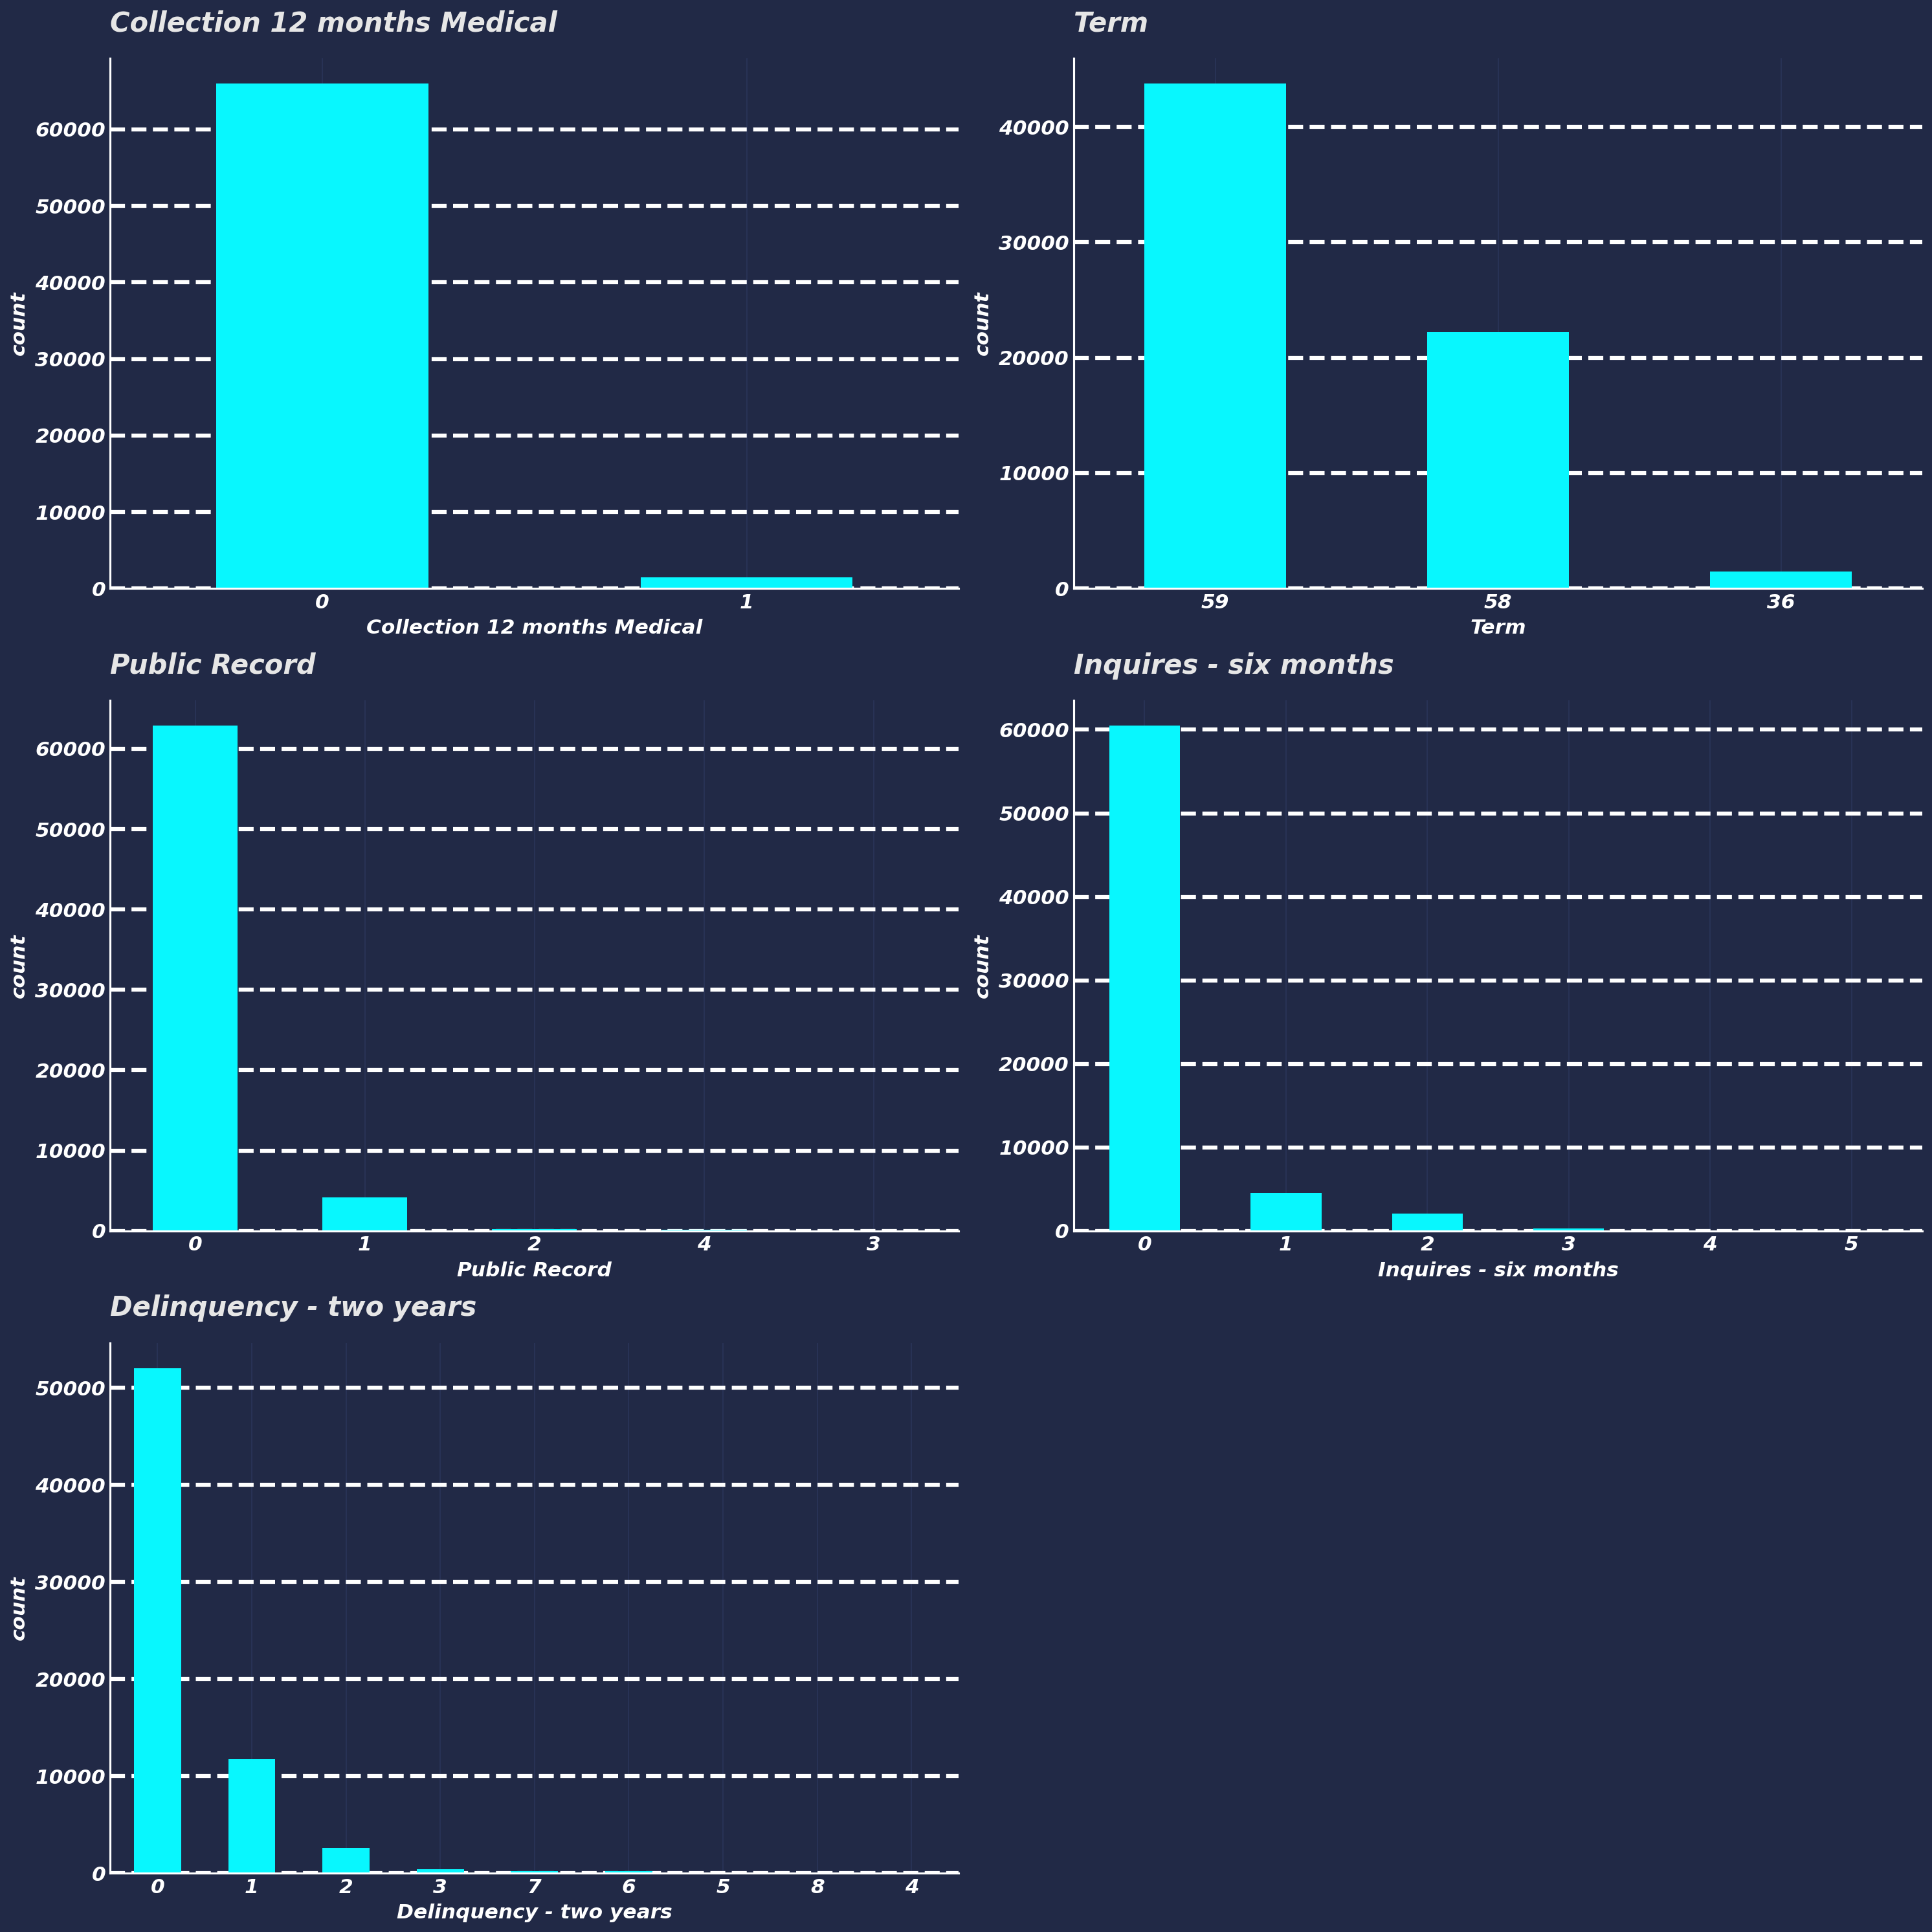

In [67]:
#plot 

for i,j in enumerate(diskrit): 
    plt.subplot(3, 2, i+1) 
    train[j].value_counts().plot(kind="bar",figsize=(20,20)) 
    plt.grid(axis="y", linestyle="--", linewidth=3, color="white") 
    plt.xticks(rotation=0) 
    plt.xlabel(j) 
    plt.ylabel("count")
    plt.title(j) 
    plt.tight_layout() 
    

In [23]:
# melihat perbedaan rata² dari loan status di setiap fitur diskrit bersasarkan tabel
for i in diskrit:
    print(train.groupby(i)["Loan Status"].mean().sort_values(ascending=False))
    print("") 

Collection 12 months Medical
0    0.092539
1    0.091162
Name: Loan Status, dtype: float64

Term
36    0.105697
59    0.097099
58    0.082606
Name: Loan Status, dtype: float64

Public Record
4    0.141304
2    0.110000
1    0.100169
0    0.091823
3    0.080000
Name: Loan Status, dtype: float64

Inquires - six months
4    0.129630
2    0.095984
0    0.092567
1    0.090171
3    0.087500
5    0.000000
Name: Loan Status, dtype: float64

Delinquency - two years
4    0.187500
8    0.159091
6    0.141361
5    0.121622
7    0.107143
3    0.098876
2    0.096190
1    0.093047
0    0.091770
Name: Loan Status, dtype: float64



In [ ]:
#filter fitur continue

In [68]:
diskrit.append("Loan Status") 

In [69]:
conti = train[numer].drop(diskrit,axis=1)

In [80]:
conti.shape

(67463, 18)

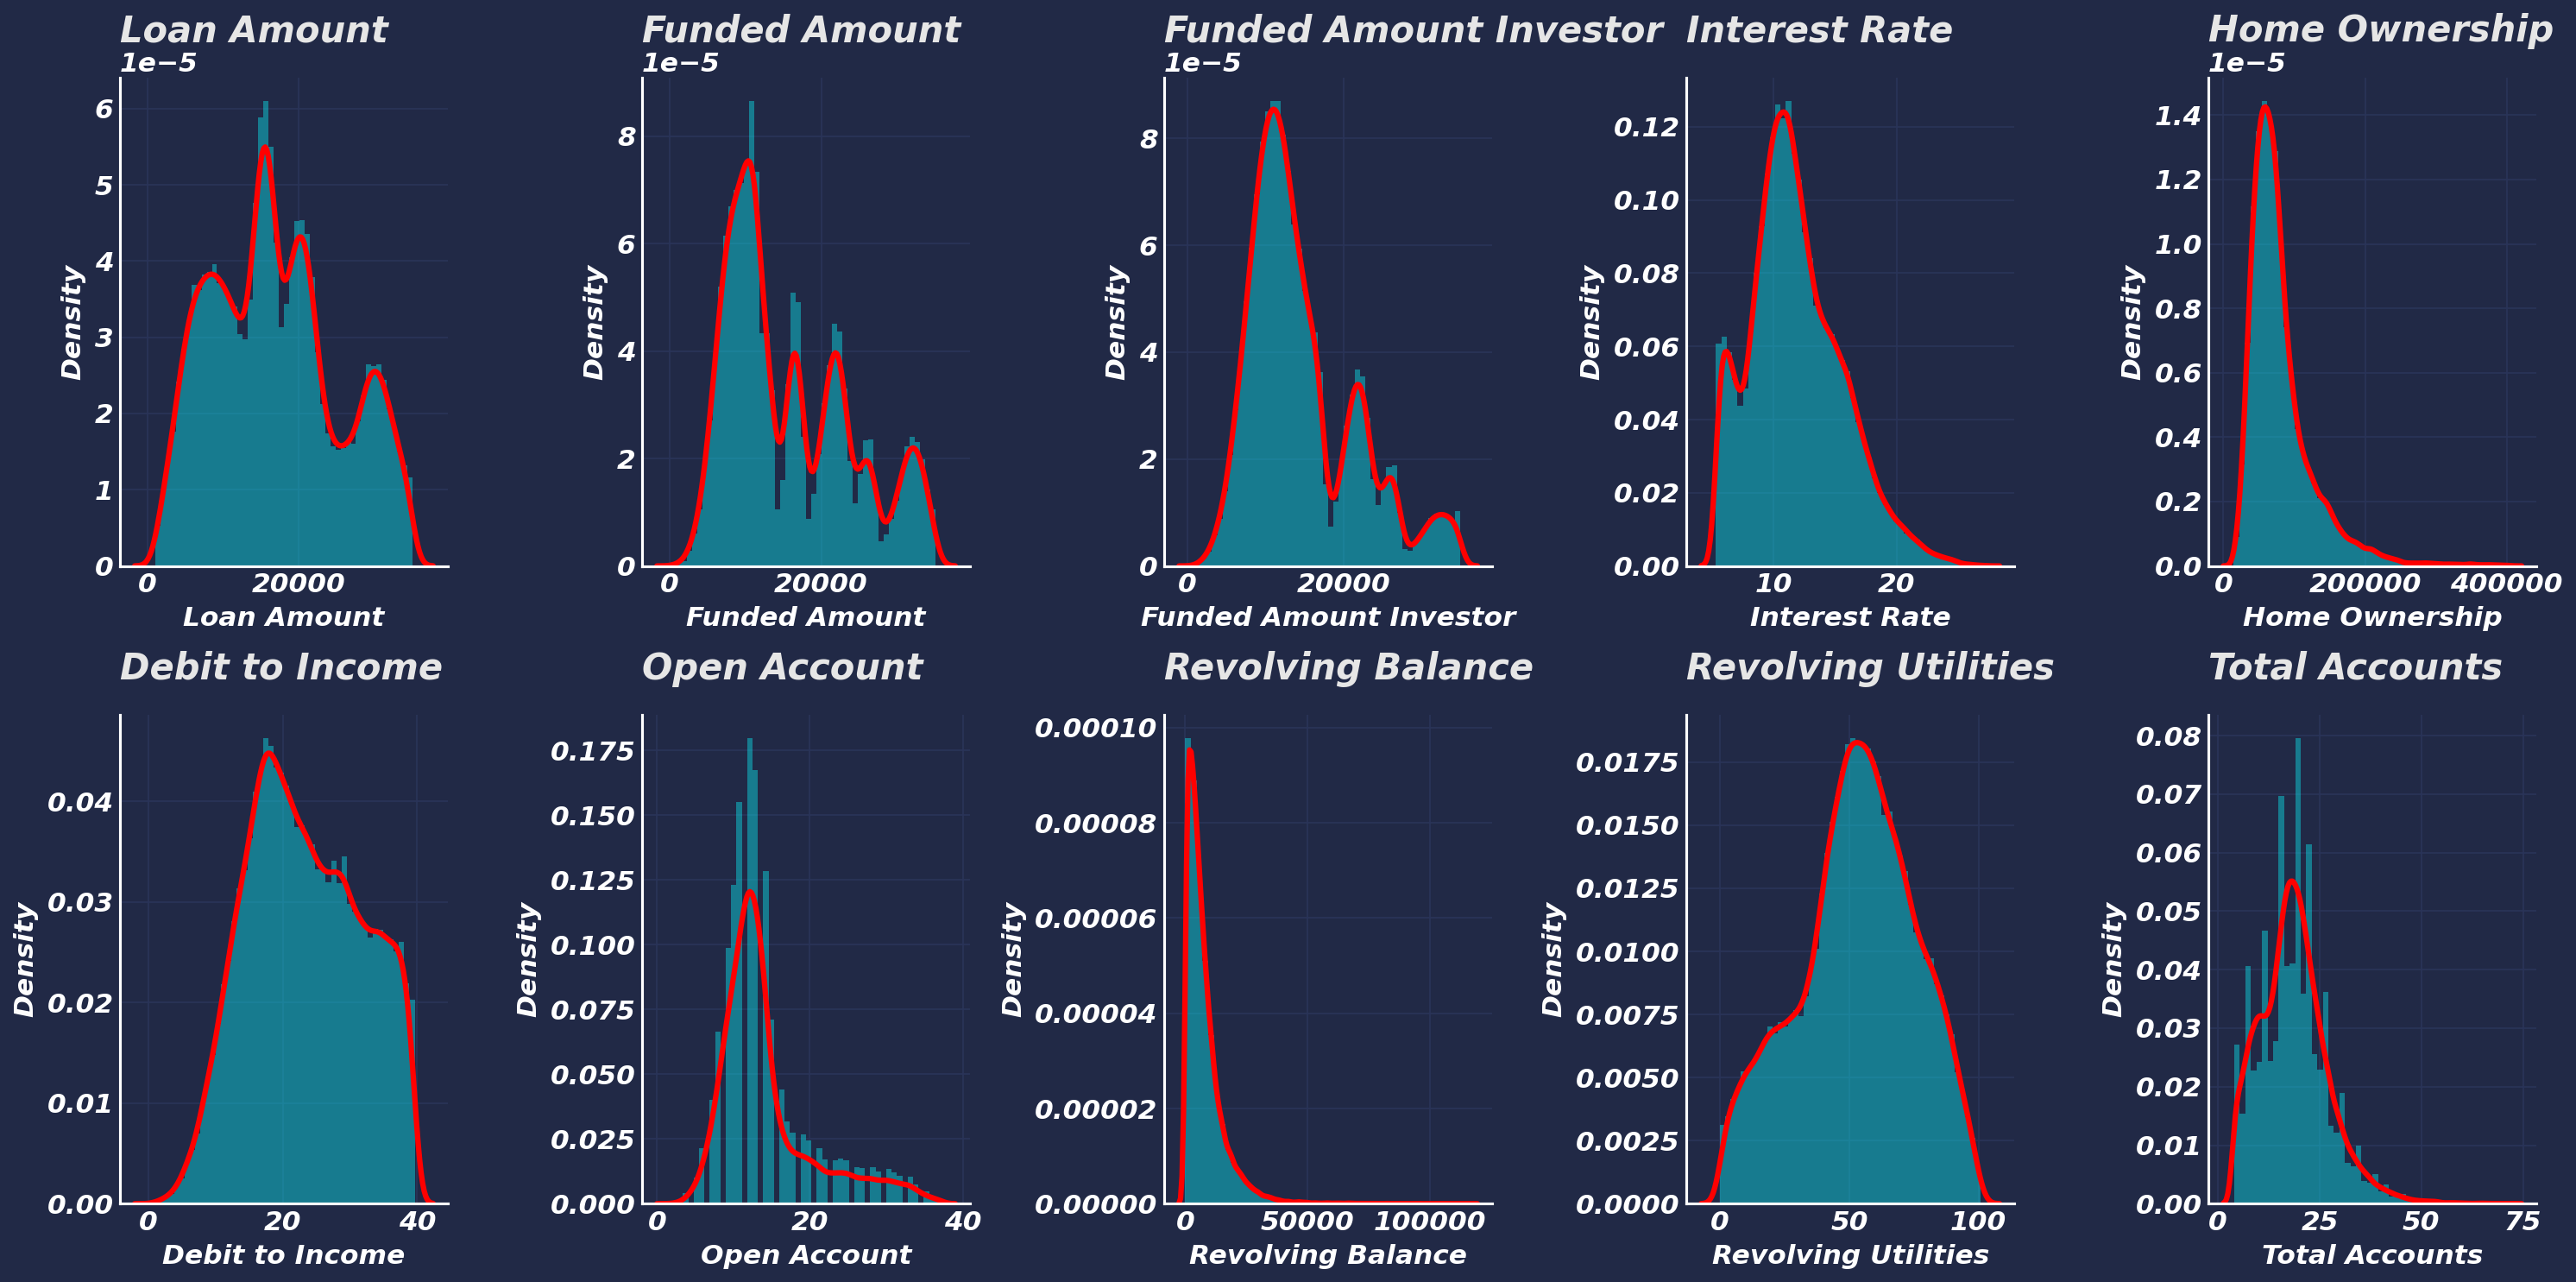

In [77]:
#plot dari colum 0~10
plt.figure(figsize=(20,10))
for i,j in enumerate(conti.iloc[:,:10].columns): 
    plt.subplot(2,5, i+1) 
    sns.distplot(train[j], kde_kws={"linewidth": 3,"color": "red"}) 
    plt.title(j) 
    plt.tight_layout() 
    

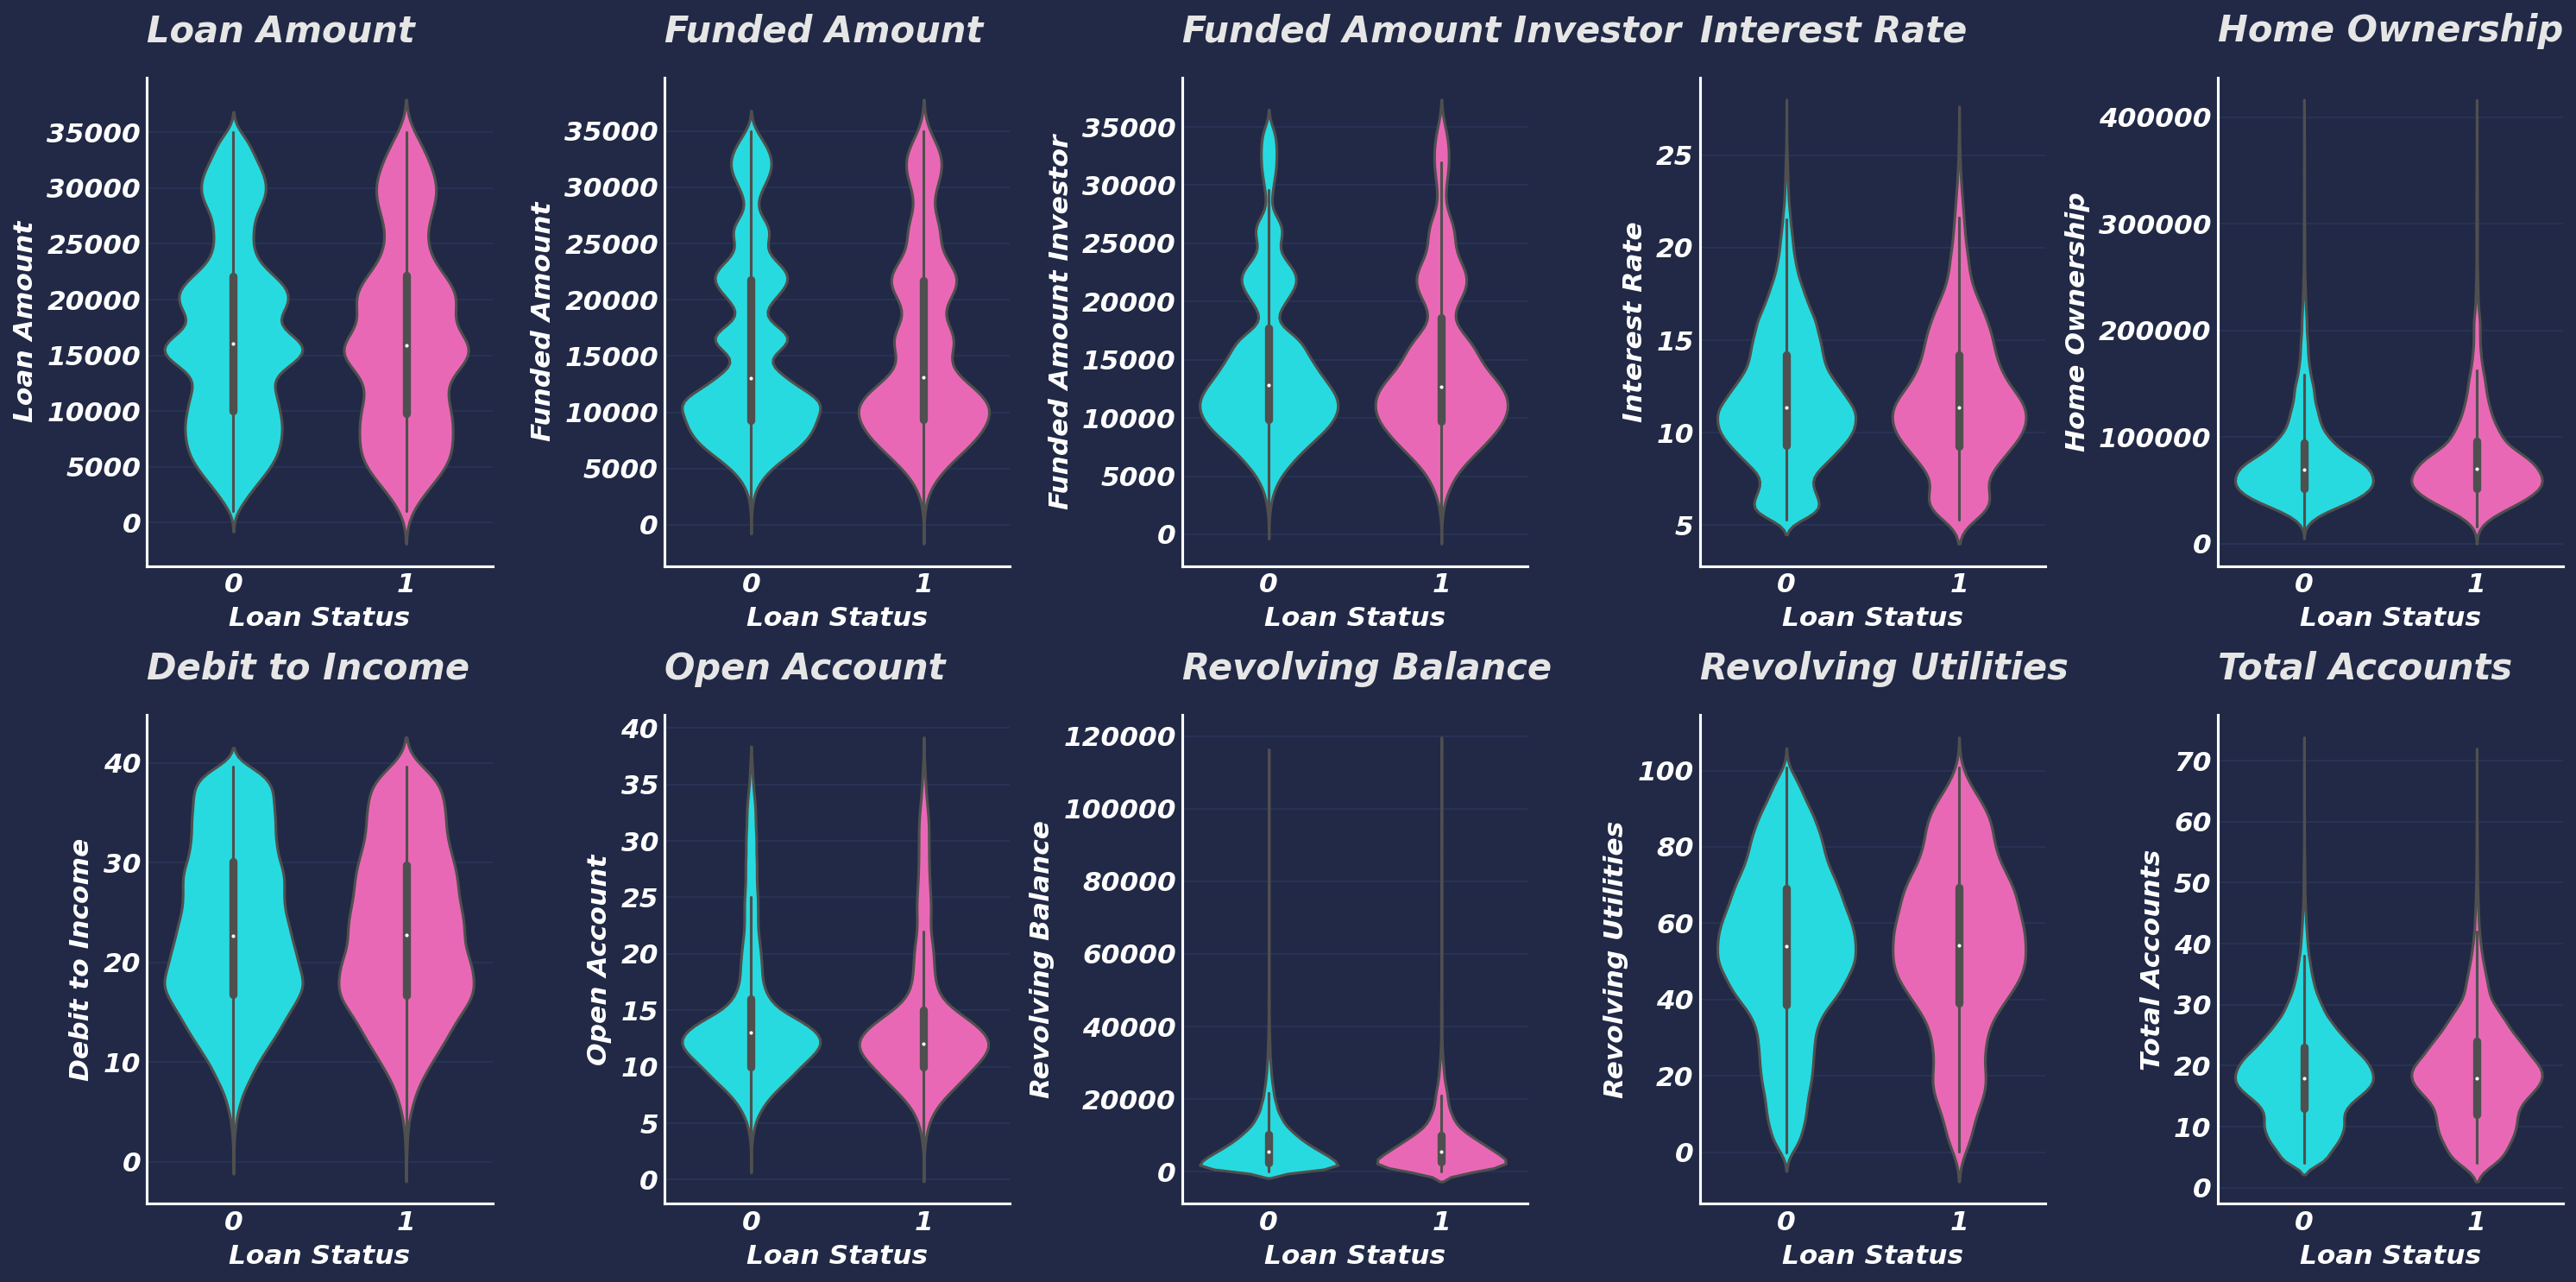

In [82]:
#plot dari colum 0~10
# bandingkan dengan violin plot berdasarkan loan status
plt.figure(figsize=(20,10))
for i,j in enumerate(conti.iloc[:,:10].columns): 
    plt.subplot(2,5, i+1) 
    sns.violinplot(x=train["Loan Status"], y = train[j]) 
    plt.title(j) 
    plt.tight_layout() 
    

In [91]:
# lihat perbadingan dengan tabel, berdasarkan rata loan status

for i in conti.iloc[:,:10].columns: 
    print(train.groupby("Loan Status")[i].mean()) 
    print("") 

Loan Status
0    16860.853092
1    16731.674411
Name: Loan Amount, dtype: float64

Loan Status
0    15767.04910
1    15805.42349
Name: Funded Amount, dtype: float64

Loan Status
0    14621.996411
1    14619.865956
Name: Funded Amount Investor, dtype: float64

Loan Status
0    11.842815
1    11.880032
Name: Interest Rate, dtype: float64

Loan Status
0    80488.081484
1    81065.543995
Name: Home Ownership, dtype: float64

Loan Status
0    23.307491
1    23.218310
Name: Debit to Income, dtype: float64

Loan Status
0    14.280618
1    14.128665
Name: Open Account, dtype: float64

Loan Status
0    7702.027555
1    7673.002243
Name: Revolving Balance, dtype: float64

Loan Status
0    52.859795
1    53.180279
Name: Revolving Utilities, dtype: float64

Loan Status
0    18.627340
1    18.633713
Name: Total Accounts, dtype: float64



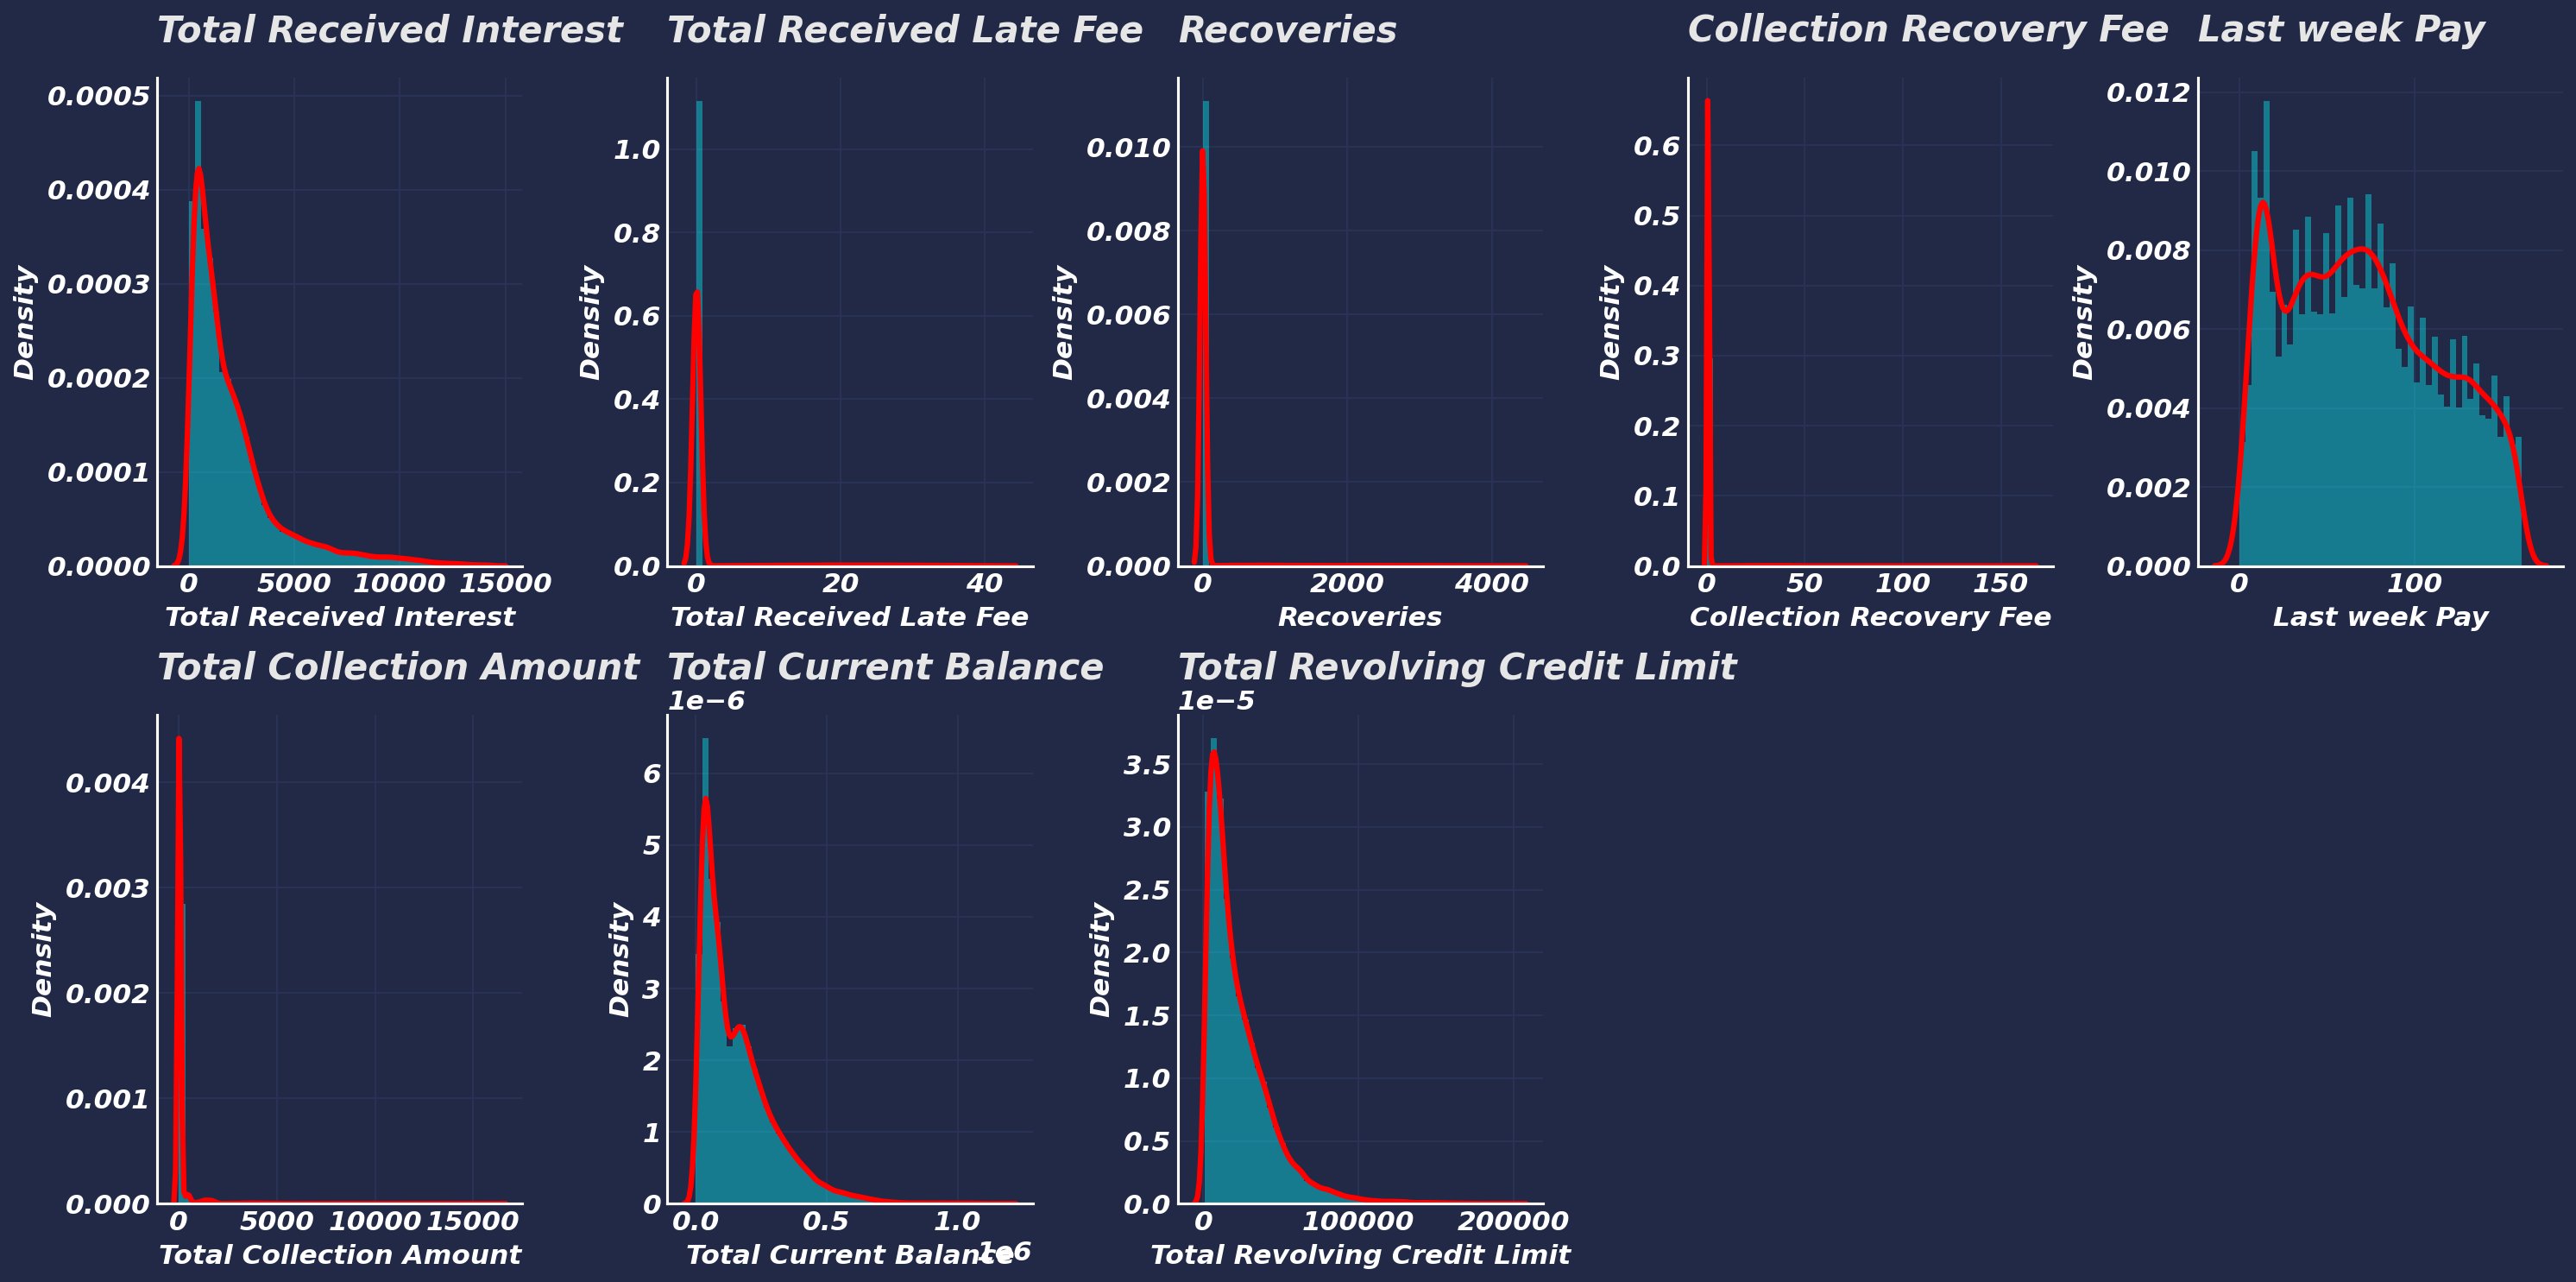

In [76]:
#plot dari colum 10~18
plt.figure(figsize=(20,10))
for i,j in enumerate(conti.iloc[:,10:].columns): 
    plt.subplot(2,5, i+1) 
    sns.distplot(train[j], kde_kws={"linewidth": 3,"color": "red"}) 
    plt.title(j) 
    plt.tight_layout() 
    

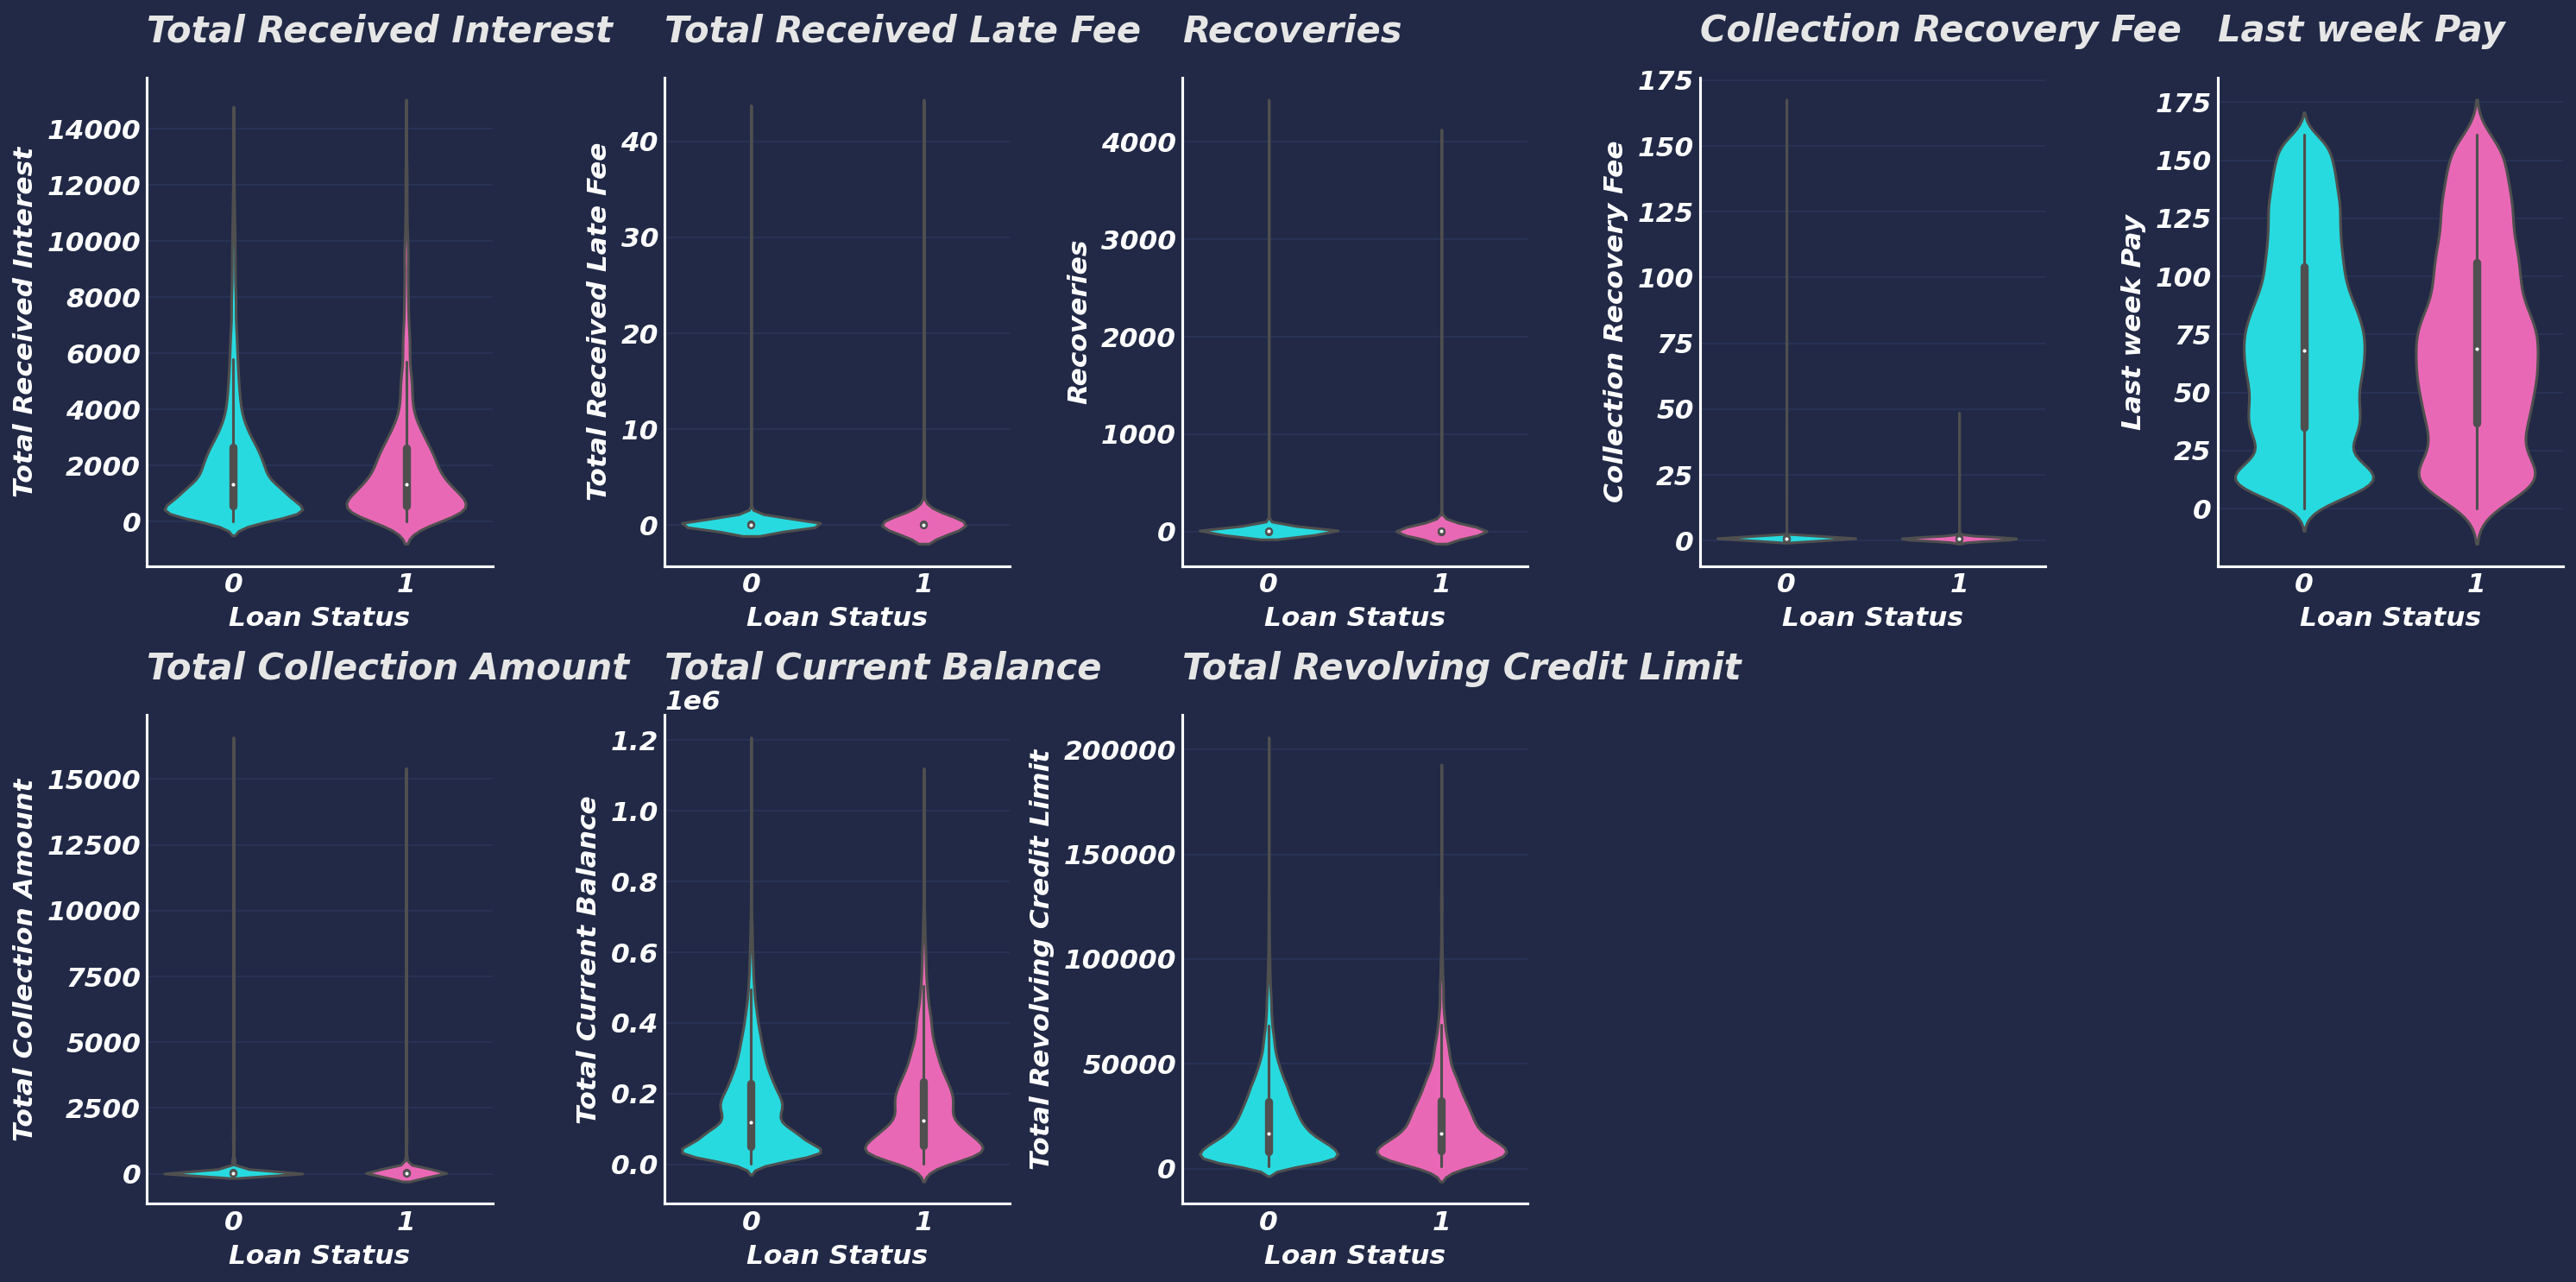

In [92]:
#plot dari colum 10~18
# bandingkan dengan violin plot berdasarkan loan status
plt.figure(figsize=(20,10))
for i,j in enumerate(conti.iloc[:,10:].columns): 
    plt.subplot(2,5, i+1) 
    sns.violinplot(x=train["Loan Status"], y = train[j]) 
    plt.title(j) 
    plt.tight_layout() 
    

In [93]:
# lihat perbadingan dengan tabel, berdasarkan rata loan status

for i in conti.iloc[:,10:].columns: 
    print(train.groupby("Loan Status")[i].mean()) 
    print("") 

Loan Status
0    2067.801020
1    2080.680944
Name: Total Received Interest, dtype: float64

Loan Status
0    1.128288
1    1.297790
Name: Total Received Late Fee, dtype: float64

Loan Status
0    59.765850
1    58.962992
Name: Recoveries, dtype: float64

Loan Status
0    1.129406
1    1.083303
Name: Collection Recovery Fee, dtype: float64

Loan Status
0    71.078665
1    71.993110
Name: Last week Pay, dtype: float64

Loan Status
0    144.592238
1    164.868451
Name: Total Collection Amount, dtype: float64

Loan Status
0    159137.669874
1    163853.526678
Name: Total Current Balance, dtype: float64

Loan Status
0    23113.297703
1    23218.236020
Name: Total Revolving Credit Limit, dtype: float64



In [24]:
# filter untuk memeriksa korelasi loan status 1 & 0

loan_1 = train[train["Loan Status"] == 1].drop("Loan Status", axis=1) 
loan_0 = train[train["Loan Status"] == 0].drop("Loan Status", axis=1) 

Text(0.0, 1.0, 'Correlation of loan status == 1')

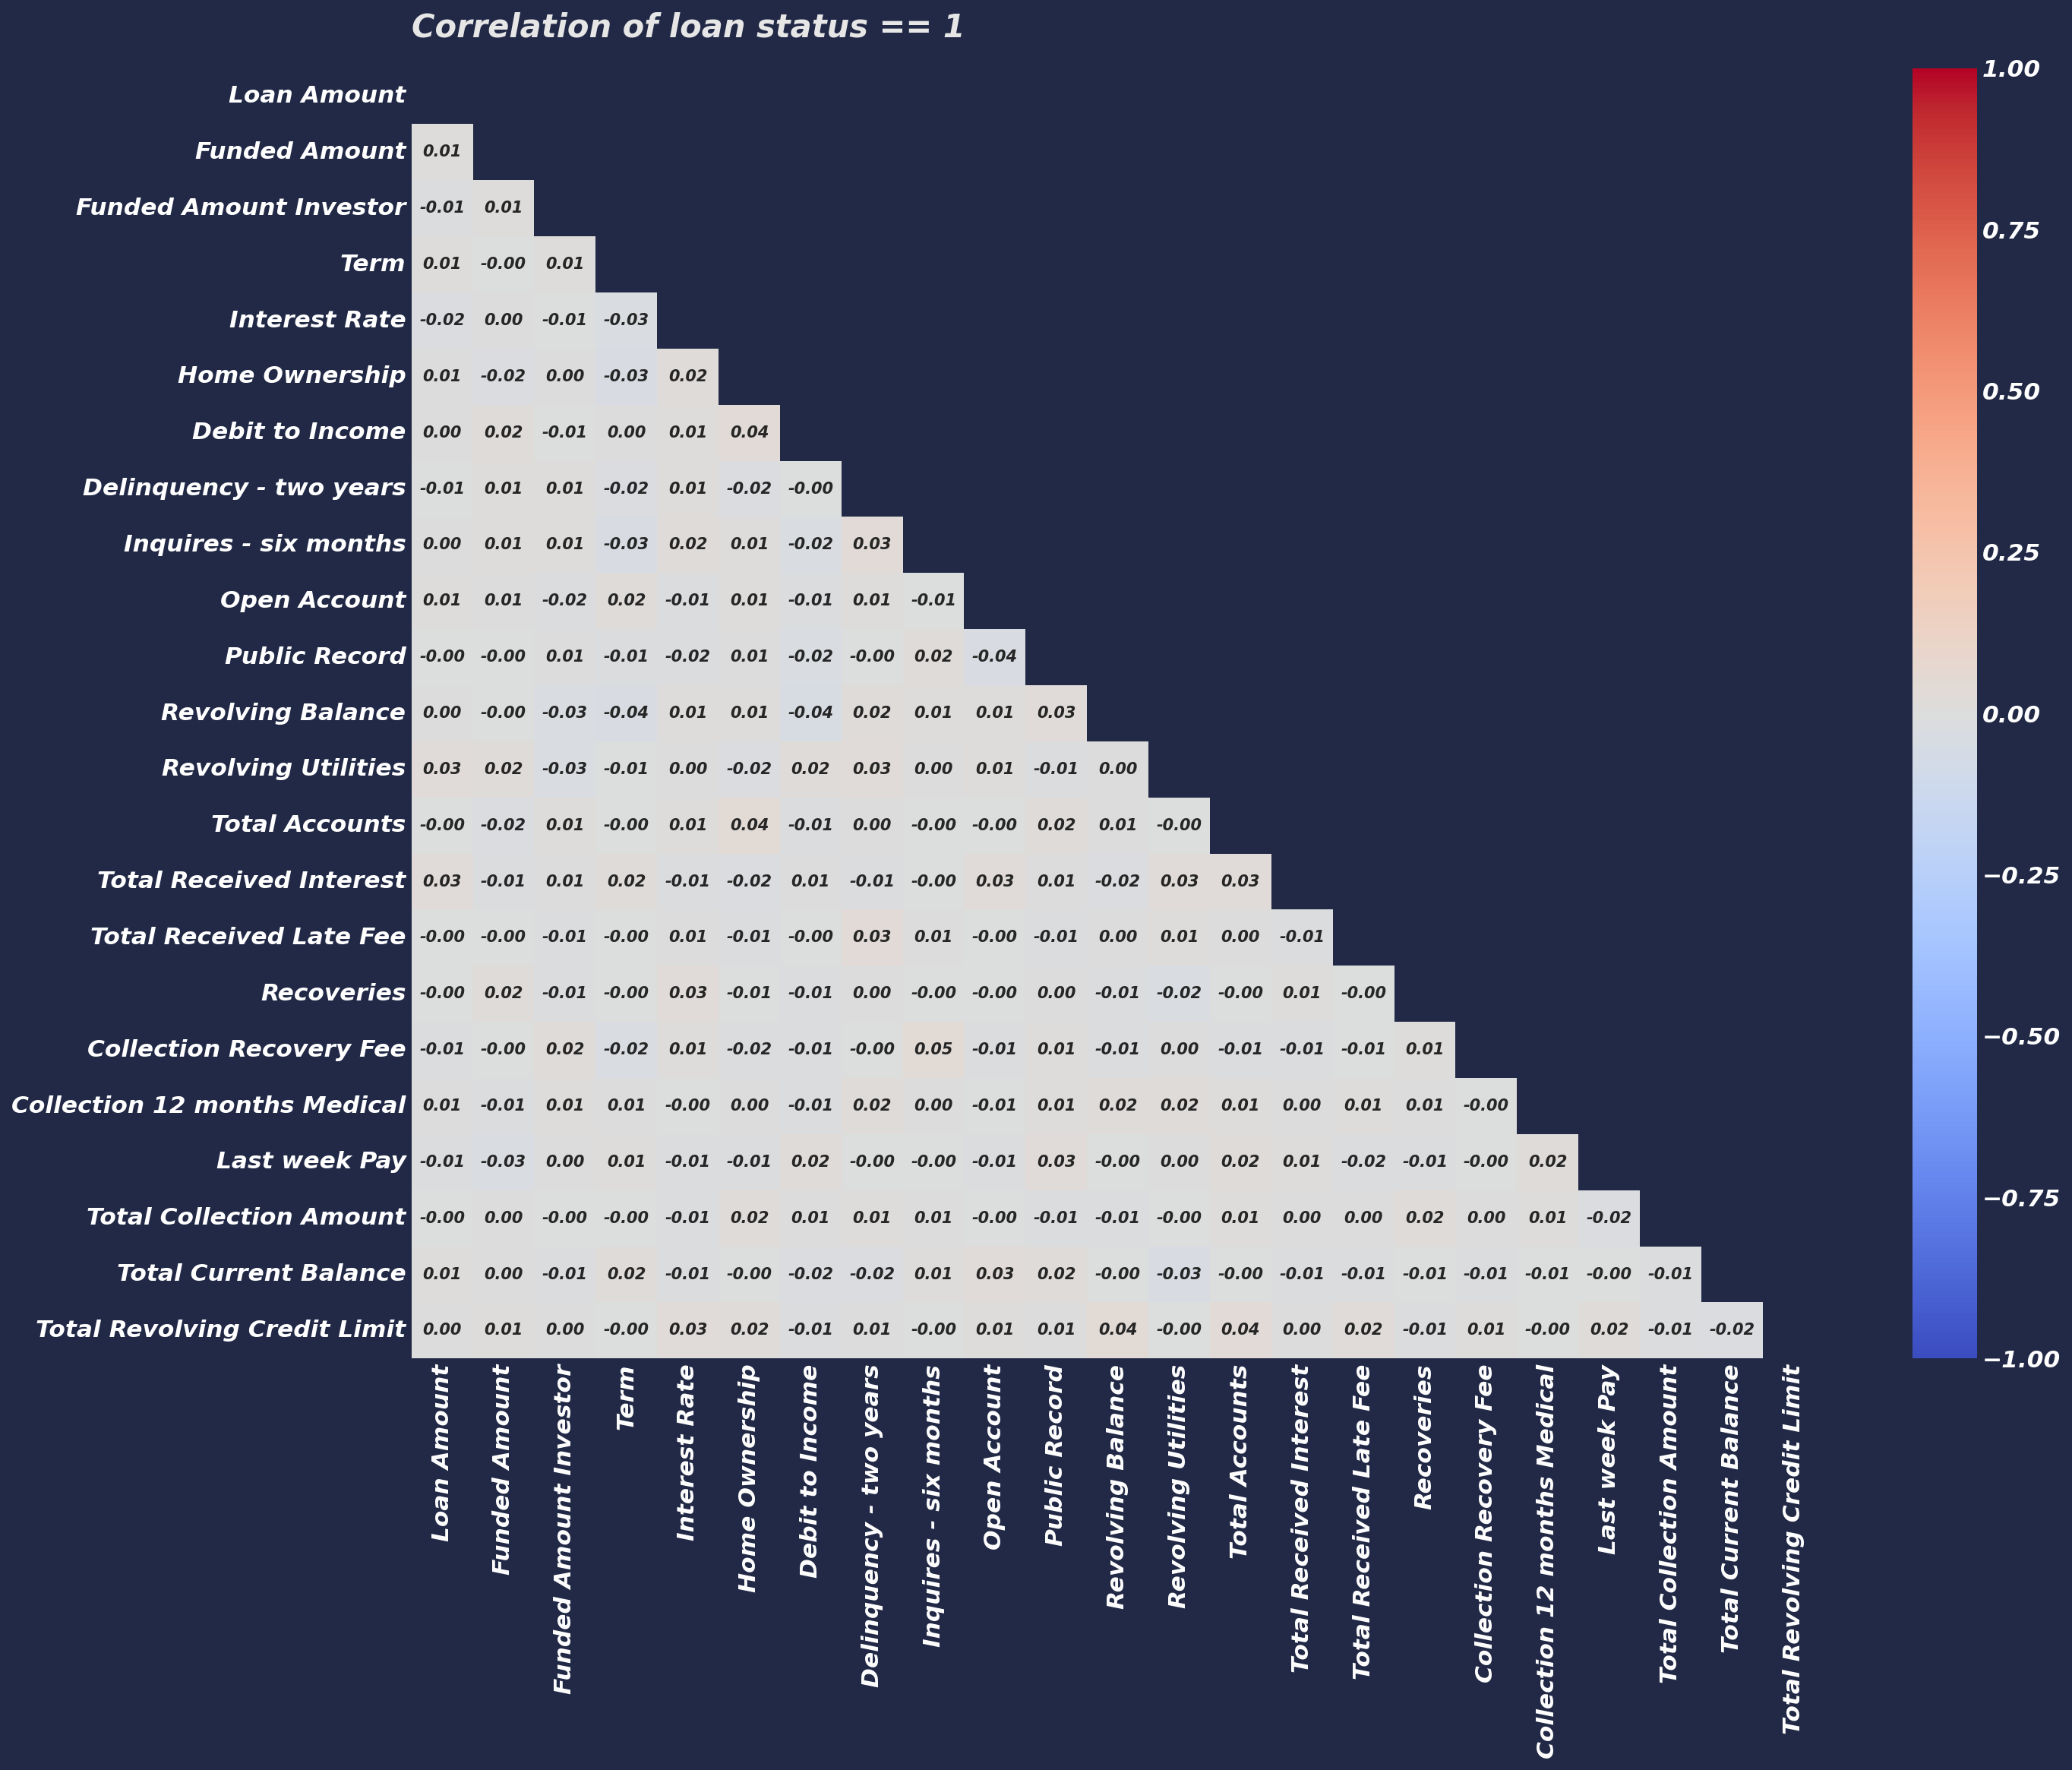

In [28]:
# korelasi fitur numeric loan status == 1

plt.figure(figsize=(20,15))
sns.heatmap(loan_1.corr(), mask=np.triu(loan_1.corr()), vmin=-1, vmax=1, annot=True, cmap="coolwarm",fmt=".2f") 
plt.title("Correlation of loan status == 1") 

Text(0.0, 1.0, 'Correlation of loan status == 0')

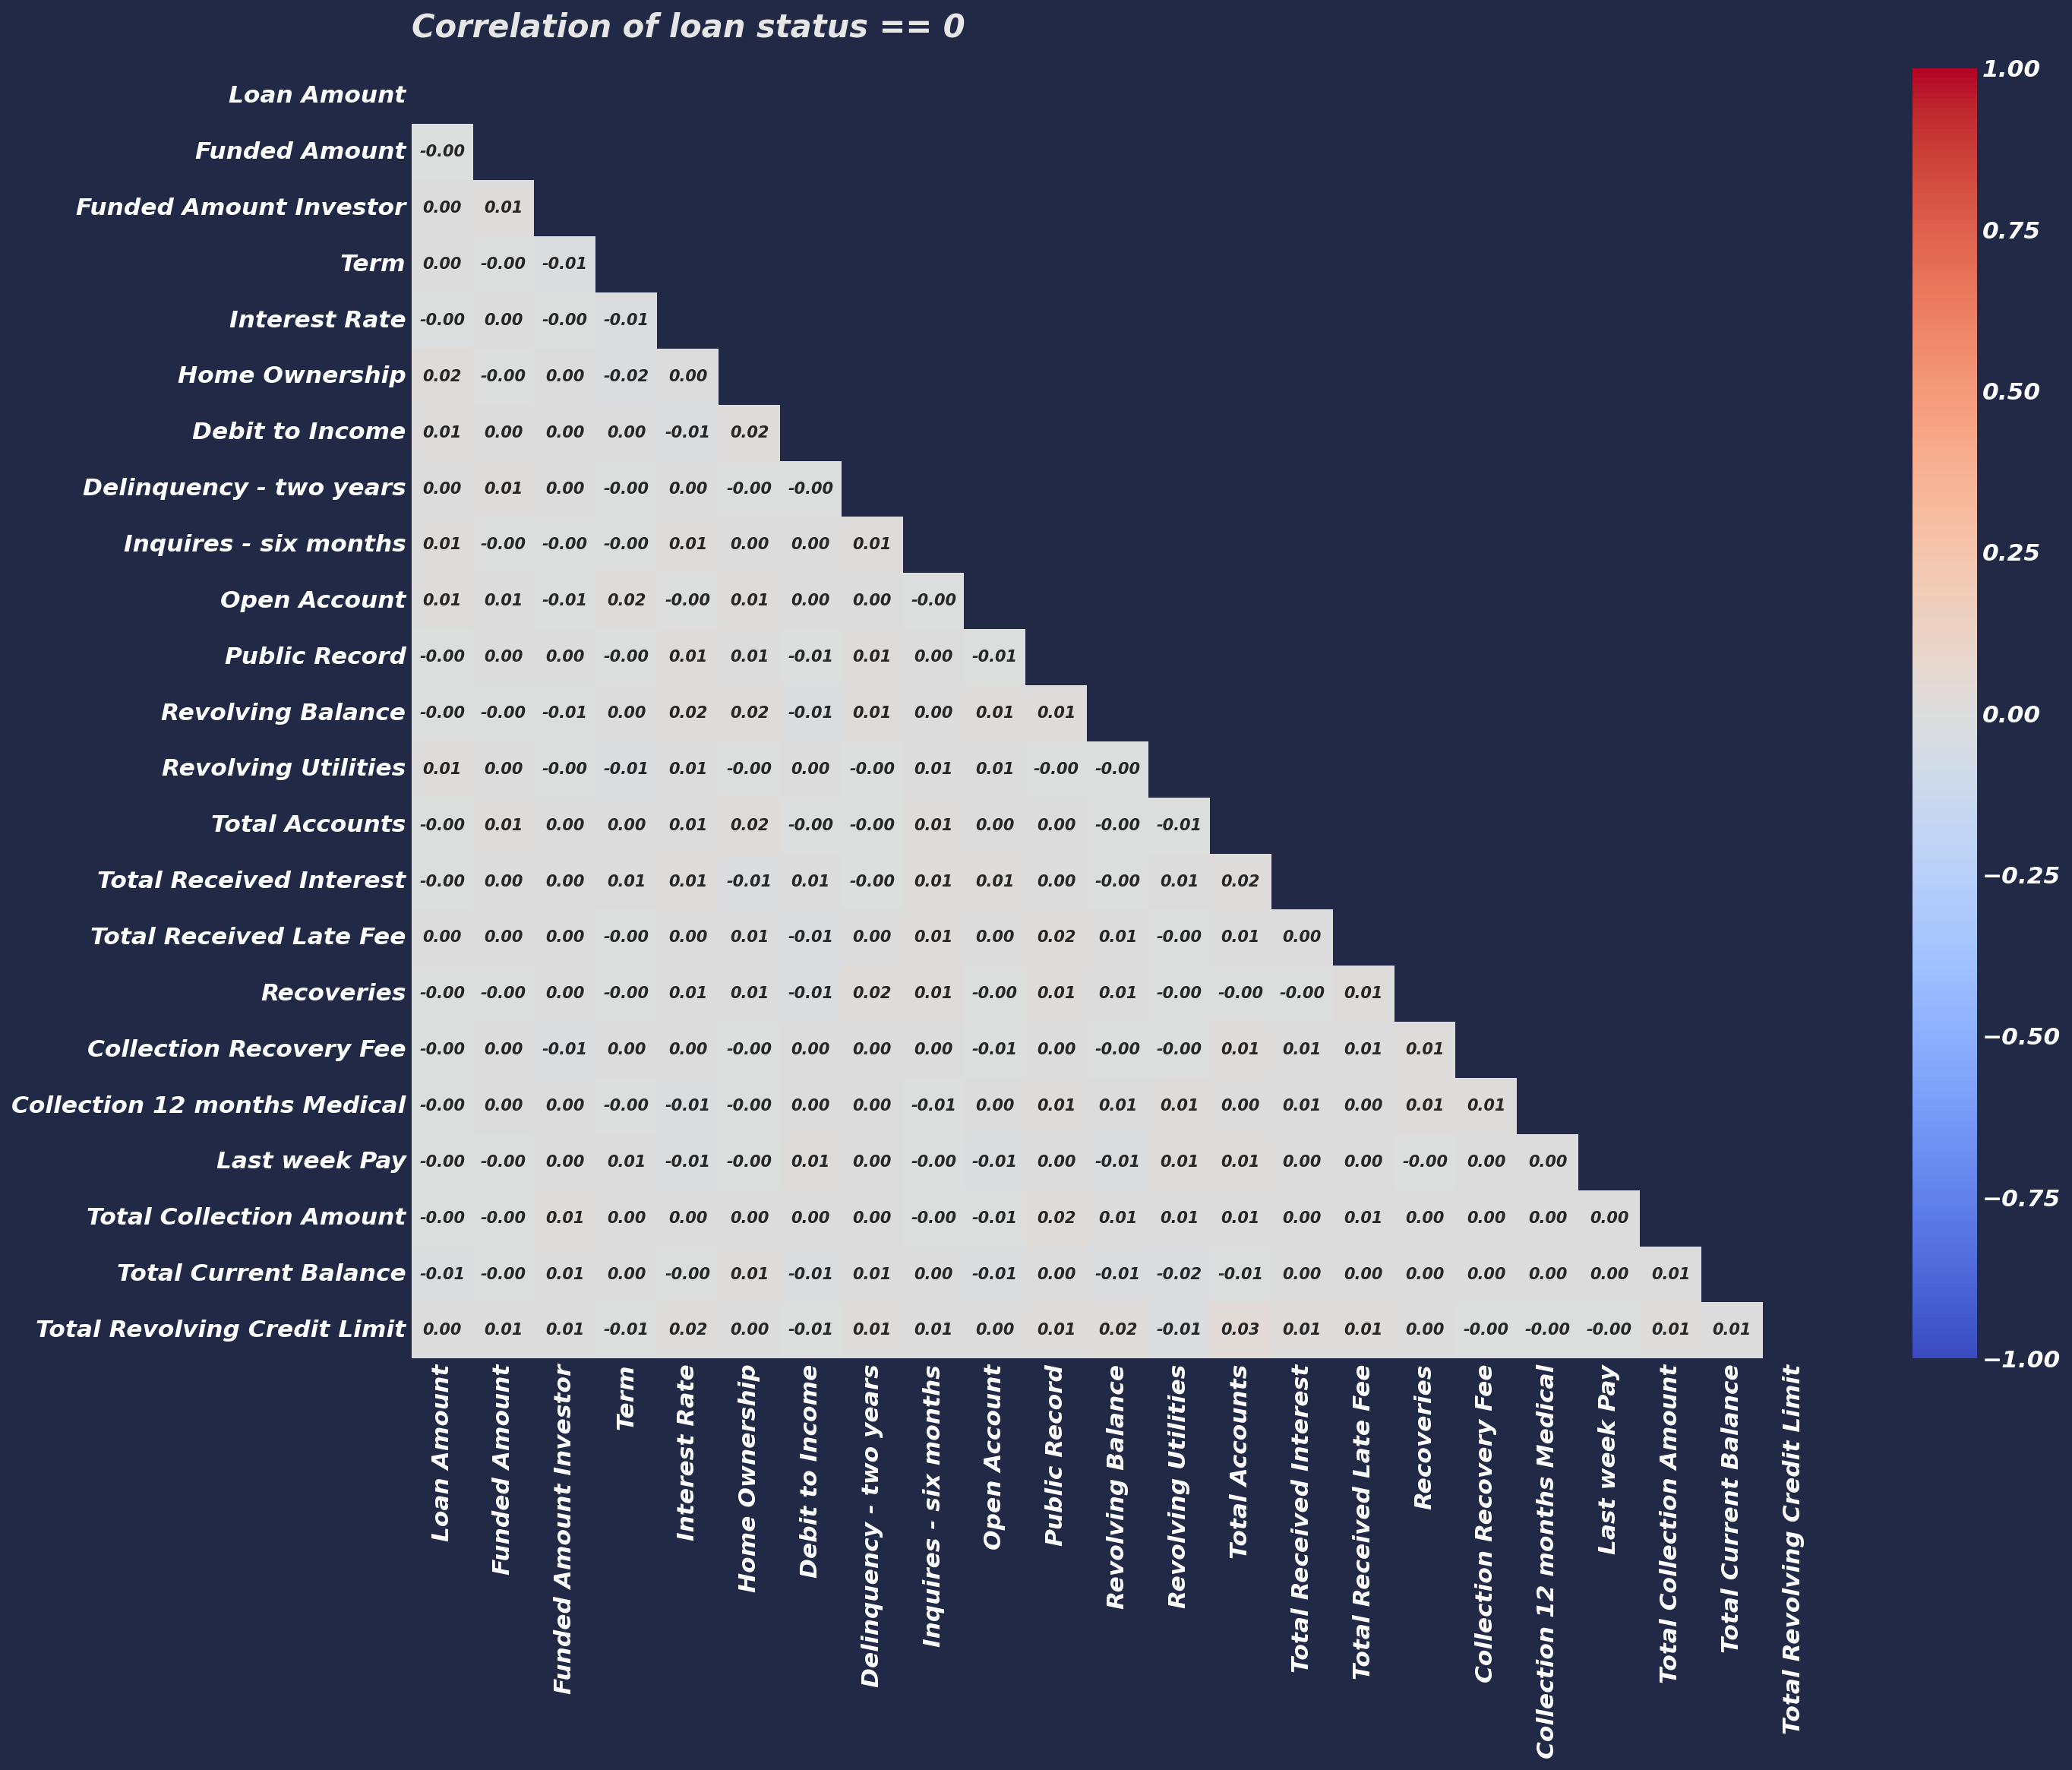

In [29]:
# korelasi fitur numerik loan status == 0

plt.figure(figsize=(20,15))
sns.heatmap(loan_0.corr(), mask=np.triu(loan_0.corr()), vmin=-1, vmax=1, annot=True, cmap="coolwarm",fmt=".2f") 
plt.title("Correlation of loan status == 0") 

In [ ]:
## final

In [51]:
train

Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0            10000          32236             12329.36286    59   
1             3609          11940             12191.99692    59   
2            28276           9311             21603.22455    59   
3            11170           6954             17877.15585    59   
4            16890          13226             13539.92667    59   
...            ...            ...                     ...   ...   
67458        13601           6848             13175.28583    59   
67459         8323          11046             15637.46301    59   
67460        15897          32921             12329.45775    59   
67461        16567           4975             21353.68465    59   
67462        15353          29875             14207.44860    59   

      Batch Enrolled  Interest Rate Grade Sub Grade Employment Duration  \
0         BAT2522922      11.135007     B        C4            MORTGAGE   
1         BAT1586599      12.237563     C        D3                RENT   
2         BAT2136391      12.545884     F        D4            MORTGAGE   
3         BAT2428731      16.731201     C        C3            MORTGAGE   
4         BAT5341619      15.008300     C        D4            MORTGAGE   
...              ...            ...   ...       ...                 ...   
67458     BAT3193689       9.408858     C        A4            MORTGAGE   
67459     BAT1780517       9.972104     C        B3                RENT   
67460     BAT1761981      19.650943     A        F3            MORTGAGE   
67461     BAT2333412      13.169095     D        E3                 OWN   
67462     BAT1930365      16.034631     B        D1            MORTGAGE   

       Home Ownership Verification Status               Loan Title  \
0        176346.62670        Not Verified       Debt consolidation   
1         39833.92100     Source Verified       Debt consolidation   
2         91506.69105     Source Verified       Debt consolidation   
3        108286.57590     Source Verified       Debt consolidation   
4         44234.82545     Source Verified  Credit card refinancing   
...               ...                 ...                      ...   
67458     83961.15003            Verified  Credit card refinancing   
67459     65491.12817     Source Verified  Credit card refinancing   
67460     34813.96985            Verified                    Other   
67461     96938.83564        Not Verified       Debt consolidation   
67462    105123.15580            Verified       Debt consolidation   

       Debit to Income  Delinquency - two years  Inquires - six months  \
0            16.284758                        1                      0   
1            15.412409                        0                      0   
2            28.137619                        0                      0   
3            18.043730                        1                      0   
4            17.209886                        1                      3   
...                ...                      ...                    ...   
67458        28.105127                        1                      0   
67459        17.694279                        0                      0   
67460        10.295774                        0                      0   
67461         7.614624                        0                      0   
67462        16.052112                        0                      0   

       Open Account  Public Record  Revolving Balance  Revolving Utilities  \
0                13              0              24246            74.932551   
1                12              0                812            78.297186   
2                14              0               1843             2.073040   
3                 7              0              13819            67.467951   
4                13              1               1544            85.250761   
...             ...            ...                ...                  ...   
67458            13      

In [54]:
print(train.shape)
print(test.shape)
print("")
print(train.isnull().any().sum()) 
print(train.duplicated().sum()) 

(67463, 31)
(28913, 31)

0
0


In [55]:
test

Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0            17120          10365            16025.082690    59   
1             7133          11650            12615.795600    59   
2            25291          25825            11621.280830    59   
3            30781           9664            15375.823510    59   
4             8878           9419             7176.647582    58   
...            ...            ...                     ...   ...   
28908        35000          35000            35000.000000    60   
28909        25000          25000            25000.000000    60   
28910        30000          30000            29950.000000    60   
28911        25000          25000            24950.000000    60   
28912        24925          24925            24925.000000    60   

      Batch Enrolled  Interest Rate Grade Sub Grade Employment Duration  \
0         BAT2575549      12.163926     A        D1                RENT   
1         BAT2833642       6.564296     B        E3            MORTGAGE   
2         BAT1761981      14.729900     A        C3            MORTGAGE   
3         BAT5341619      10.523767     A        A2                RENT   
4         BAT4694572       9.997013     C        B3                 OWN   
...              ...            ...   ...       ...                 ...   
28908     BAT5629144      16.240000     C        C5            MORTGAGE   
28909     BAT5629144      14.980000     C        C3            MORTGAGE   
28910     BAT2136391      18.240000     D        D5            MORTGAGE   
28911     BAT2136391      15.610000     D        D1            MORTGAGE   
28912     BAT2575549      14.300000     C        C1            MORTGAGE   

       Home Ownership Verification Status               Loan Title  \
0         76468.82190     Source Verified                    Other   
1         38079.01344     Source Verified  Credit card refinancing   
2         51275.93268     Source Verified       Debt consolidation   
3         68867.98965            Verified       Debt consolidation   
4         91556.85423            Verified       Debt consolidation   
...               ...                 ...                      ...   
28908    360000.00000            Verified  Credit card refinancing   
28909    105000.00000     Source Verified       Debt consolidation   
28910     74100.00000            Verified       Debt consolidation   
28911    130000.00000            Verified       Debt consolidation   
28912     56000.00000            Verified       Debt consolidation   

       Debit to Income  Delinquency - two years  Inquires - six months  \
0            16.749219                        1                      0   
1            18.157975                        0                      0   
2            15.190011                        0                      0   
3            21.292550                        0                      0   
4             4.812117                        0                      0   
...                ...                      ...                    ...   
28908         7.310000                        0                      0   
28909        10.220000                        0                      1   
28910        27.300000                        0                      0   
28911        27.290000                        2                      0   
28912        10.390000                        0                      0   

       Open Account  Public Record  Revolving Balance  Revolving Utilities  \
0                12              1               3576            67.278287   
1                11              0               1932            71.313157   
2                22              0                598            50.883065   
3                11              0               5222            82.449083   
4                11              0                553            49.075855   
...             ...            ...                ...                  ...   
28908             8      

In [57]:
test.drop("Loan Status",axis=1,inplace=True) 

In [ ]:
train.to_csv("train_loan(clean).csv",index = False)
test.to_csv("test_loan(clean).csv",index=False)